In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import ADASYN 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from optuna.integration import XGBoostPruningCallback
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as ltb 
import optuna
from sklearn.metrics import log_loss
import shap


C:\Users\selvi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Reading the file in a Dataframe

In [3]:
students = pd.read_csv("students.csv")
students_df = students.copy()

In [4]:
pd.set_option("display.max_columns", None)
students_df.head()

Marital status  Application mode  Application order  Course  \
0               0                 7                  5       1   
1               0                 5                  1      10   
2               0                 0                  5       4   
3               0                 7                  2      14   
4               1                11                  1       2   

   Day_evening_time  Previous qualification  Previous_qualifications_grade  \
0                 1                       0                          122.0   
1                 1                       0                          160.0   
2                 1                       0                          122.0   
3                 1                       0                          122.0   
4                 0                       0                          100.0   

   Nationality  Mother_qualification  Father_qualification  Mother_occupation  \
0            0                    12                     9                  5   
1            0                     0                     2                  3   
2            0                    21                    26                  9   
3            0                    22                    26                  5   
4            0                    21                    27                  9   

   Father_occupation  Admission grade  Displaced  Educational special needs  \
0                  9            127.3          1                          0   
1                  3            142.5          1                          0   
2                  9            124.8          1                          0   
3                  3            119.6          1                          0   
4                  9            141.5          0                          0   

   Debtor  Tuition fees up to date  Gender  Scholarship holder  \
0       0                        1       1                   0   
1       0                        0       1                   0   
2       0                        0       1                   0   
3       0                        1       0                   0   
4       0                        1       0                   0   

   Age at enrollment  International  Curricular units 1st sem (credited)  \
0                 20              0                                    0   
1                 19              0                                    0   
2                 19              0                                    0   
3                 20              0                                    0   
4                 45              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2

### Checking the datatypes

In [6]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Day_evening_time                                4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous_qualifications_grade                   4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother_qualification                            4424 non-null   int64  
 9   Father_qualification                     

### Converting the categorical columns to category (for the purpose of encoding for PCA)

In [8]:
categorical_columns = ['Scholarship holder','Displaced', 'Debtor', 'Tuition fees up to date']

for col in categorical_columns:
    students_df[col] = students_df[col].astype("category")

# Experiment 9: Unsupervised Algorithm - Clustering for Class Pattern Discovery:

Unsupervised algorithms like KMeans clustering, KMedoids, t-SNE were employed as a learning approach to explore the natural groupings within the dataset. Moreover PCA and Autoencoders were utilised to reduce the dimensionality of the data. 

The primary objective was to determine whether the clusters formed by these algorithms align with the actual target classes: Graduate, Dropout, and Enrolled.  This analysis helps to assess whether there are distinct, separable patterns in the data that correspond to the labeled outcomes. If there is a strong alignment between clusters and the actual target classes, then it suggest that the class boundaries are well-defined in the feature space. Conversely, if the clusters do not align closely with the target labels, it indicates that the classes may exhibit significant overlap, suggesting that the feature space lacks clear separability for these outcomes.

This experiment provides insights into the underlying structure of the data and supports further decisions around feature engineering or dimensionality reduction techniques to improve class distinction.

In [10]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans


Nominal categorical (e.g., Marital status, Course)	One-Hot Encoding

Ordinal categorical (if any, with natural order)	Label Encoding or OrdinalEncoder

Continuous numerical (e.g., Admission grade, Age at enrollment)	Scale (StandardScaler)

### One Hot encoding of categorical columns (Nominal variables)

In [13]:
categorical_columns = ['Scholarship holder', 'Displaced', 'Debtor', 'Tuition fees up to date']

# One-hot encode the categorical columns
students_df = pd.get_dummies(students_df, columns=categorical_columns, drop_first=True)

In [14]:
students_df.head()

Marital status  Application mode  Application order  Course  \
0               0                 7                  5       1   
1               0                 5                  1      10   
2               0                 0                  5       4   
3               0                 7                  2      14   
4               1                11                  1       2   

   Day_evening_time  Previous qualification  Previous_qualifications_grade  \
0                 1                       0                          122.0   
1                 1                       0                          160.0   
2                 1                       0                          122.0   
3                 1                       0                          122.0   
4                 0                       0                          100.0   

   Nationality  Mother_qualification  Father_qualification  Mother_occupation  \
0            0                    12                     9                  5   
1            0                     0                     2                  3   
2            0                    21                    26                  9   
3            0                    22                    26                  5   
4            0                    21                    27                  9   

   Father_occupation  Admission grade  Educational special needs  Gender  \
0                  9            127.3                          0       1   
1                  3            142.5                          0       1   
2                  9            124.8                          0       1   
3                  3            119.6                          0       0   
4                  9            141.5                          0       0   

   Age at enrollment  International  Curricular units 1st sem (credited)  \
0                 20              0                                    0   
1                 19              0                                    0   
2                 19              0                                    0   
3                 20              0                                    0   
4                 45              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0   

In [15]:
X = students_df.drop(columns=['Target', 'Marital status', 'Application mode', 'Gender', 'Day_evening_time', 
                       'Course', 'Mother_qualification', 'Mother_occupation', 'Father_occupation', 
                       'Educational special needs', 'Previous qualification', 'Father_qualification'], axis=1)
y = students_df["Target"]

### Scaling the features - Standard Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
X = scaling.fit_transform(X)

### PCA

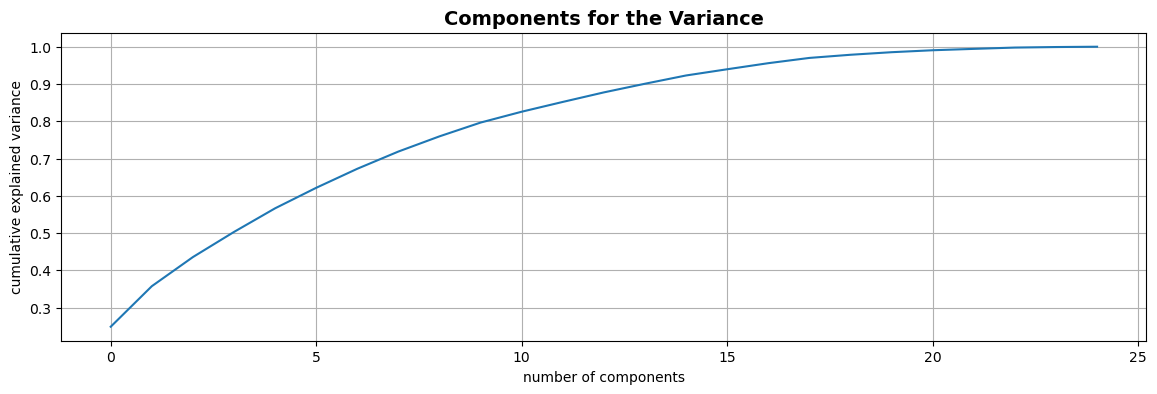

In [19]:
from sklearn.decomposition import PCA

plt.figure(figsize=(14, 4))
pca = PCA().fit(X) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.grid(True)
plt.ylabel('cumulative explained variance'); 
plt.title("Components for the Variance", fontsize=14, weight='bold')
plt.show()

In [20]:
pca = PCA(20)
X_pca = pca.fit_transform(X)

In [21]:
X_pca

array([[-5.449381  , -0.38028444, -0.54407192, ..., -1.40935239,
         0.25714651, -0.11344581],
       [-0.10982512, -0.78777313,  0.60301235, ..., -0.47142313,
        -0.01627109, -0.06686584],
       [-3.87214132,  1.04064199, -0.52361858, ...,  0.60522257,
        -0.04793322,  0.0398416 ],
       ...,
       [ 0.66433788, -1.22333088,  0.33270048, ...,  0.41104275,
        -0.49232237,  0.91679407],
       [-0.50851803, -2.23368002,  0.69960262, ..., -0.37180884,
         0.02759064,  0.33377608],
       [ 0.10301235, -0.62752986,  7.66273459, ...,  0.43226329,
         0.01707394, -0.42846992]])

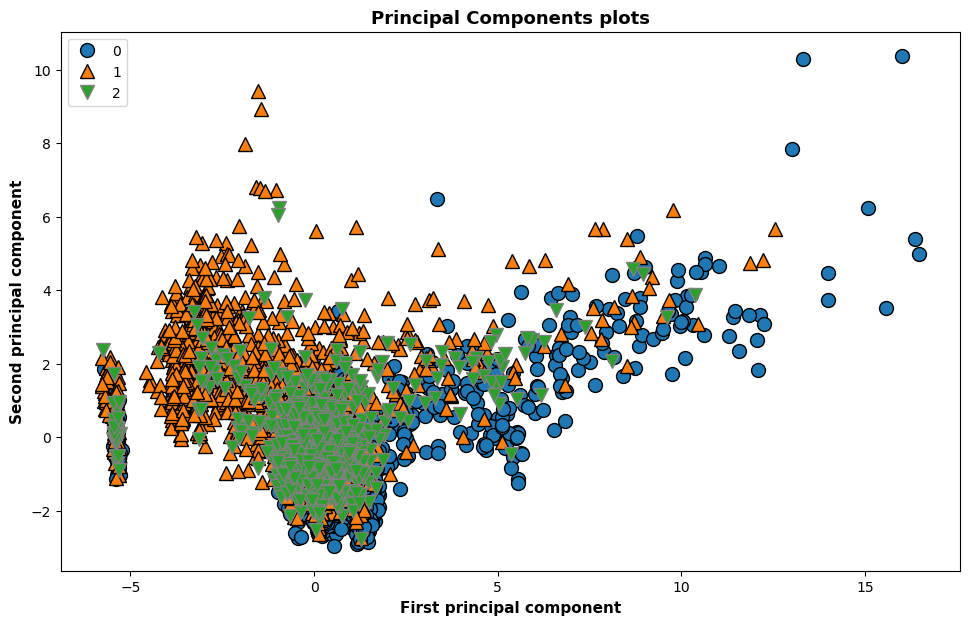

In [22]:
import mglearn
# plot first vs. second principal component, colored by class
plt.figure(figsize = (14, 7))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], students_df["Target"])
plt.legend(students_df["Target"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component",  fontsize=11, weight="bold")
plt.ylabel("Second principal component",  fontsize=11, weight="bold")
plt.title("Principal Components plots", fontsize=13, weight="bold")
plt.legend()
plt.show()


### PCA Plot:
PCA reduces high-dimensional data into fewer dimensions (e.g., 2D or 3D) while trying to preserve as much variance as possible, but it does not guarantee separability between target classes.

The overlap of graduate, dropout, and enrolled classes in PCA plots suggests:

The features do not have strong discriminatory power in the reduced space.

The real data distribution may have significant class overlap, i.e., many students share similar characteristics regardless of final status.

The current feature set may not capture the latent variables or behavioral differences that truly distinguish between the outcomes.

## KMeans - Elbow method and Silhoutte Score to find the Optimal clusters

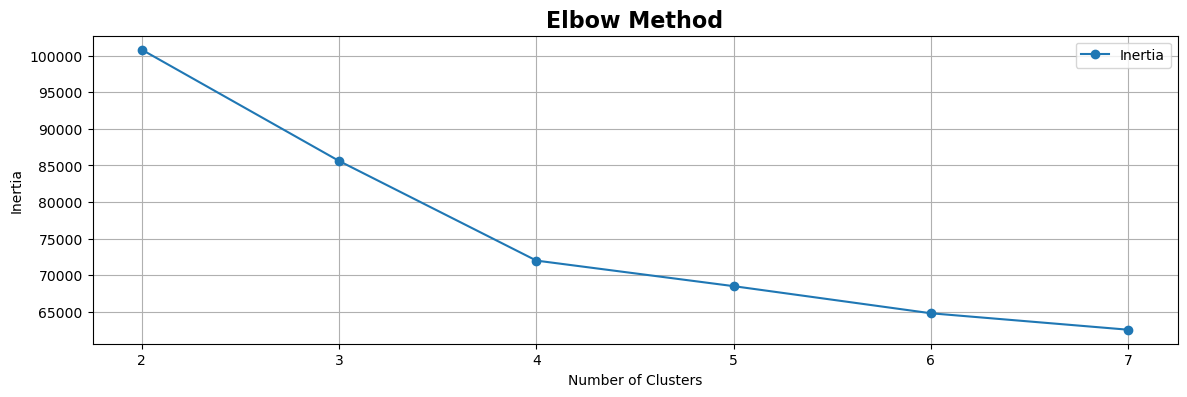

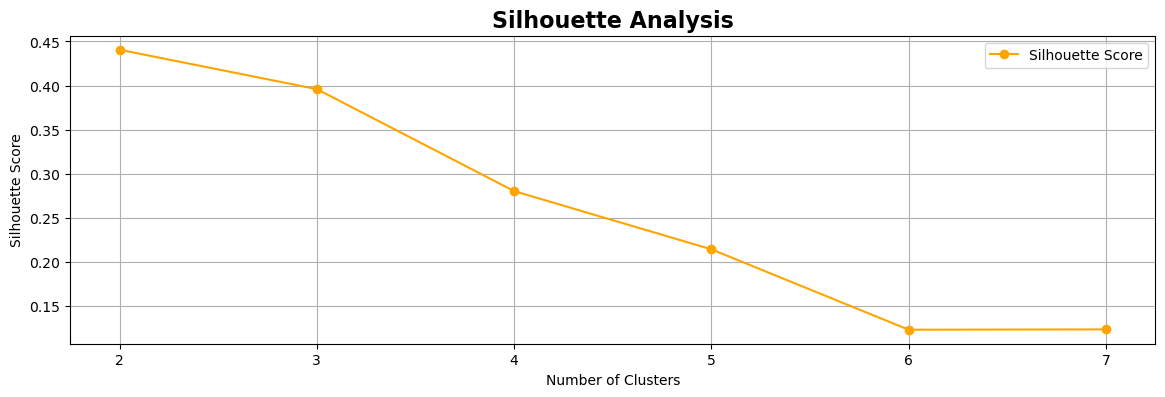

In [25]:
from sklearn.metrics import silhouette_score

inertia_values = []
silhouette_scores = []

# different numbers of clusters
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_pca)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(14,4))
plt.plot(range(2, 8), inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method',  fontsize=16, weight="bold")
plt.legend()
plt.grid(True)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(14,4))
plt.plot(range(2, 8), silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis',  fontsize=16, weight="bold")
plt.legend()
plt.grid(True)
plt.show()

#### Silhoutte Score:
For 2 clusters, the silhouette score is 0.45.

For 3 clusters, the silhouette score is 0.40.

The silhouette score of 0.45 for 2 clusters is moderate, suggesting that the clustering is not well-defined and the clusters might not be well-separated.

The silhouette score of 0.40 for 3 clusters is moderate, indicating that splitting the data into more clusters actually does not improve the overall structure. This might suggest that 7 clusters don't actually represent meaningful patterns in your data.

The low scores across both cases suggest that the data may not naturally have clear clusters, or the features used for clustering might not be distinguishing enough.

Overlapping clusters: The features used for clustering may not be differentiating well between the groups.

####  Build the clustering model


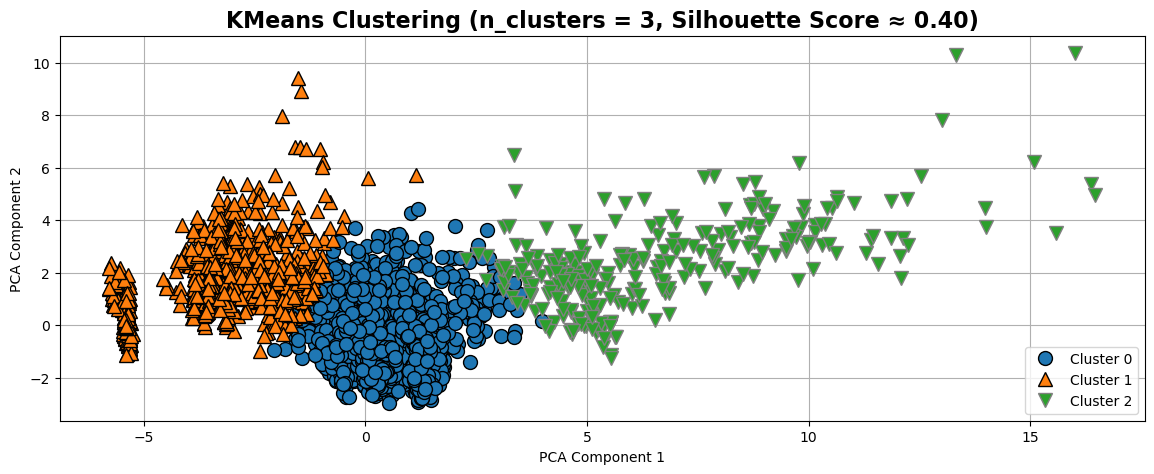

In [27]:
# Perform KMeans clustering
y_pred_kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(14, 5))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_pred_kmeans)

# Set correct cluster labels based on actual prediction order
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='lower right')

plt.title("KMeans Clustering (n_clusters = 3, Silhouette Score ≈ 0.40)", fontsize=16, weight="bold")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


#### KMeans plot for clusters: 3
The silhouette score of 0.40 for 3 clusters is moderate, indicating that splitting the data into more clusters actually does not improve the overall structure.  The low scores across both cases suggest that the data may not naturally have clear clusters, or the features used for clustering might not be distinguishing enough.

Overlapping clusters: The features used for clustering may not be differentiating well between the groups. Enrolled is overlapping very well with the Graduate and dropout classes.

## KMedoid Clustering

In [29]:
from sklearn_extra.cluster import KMedoids


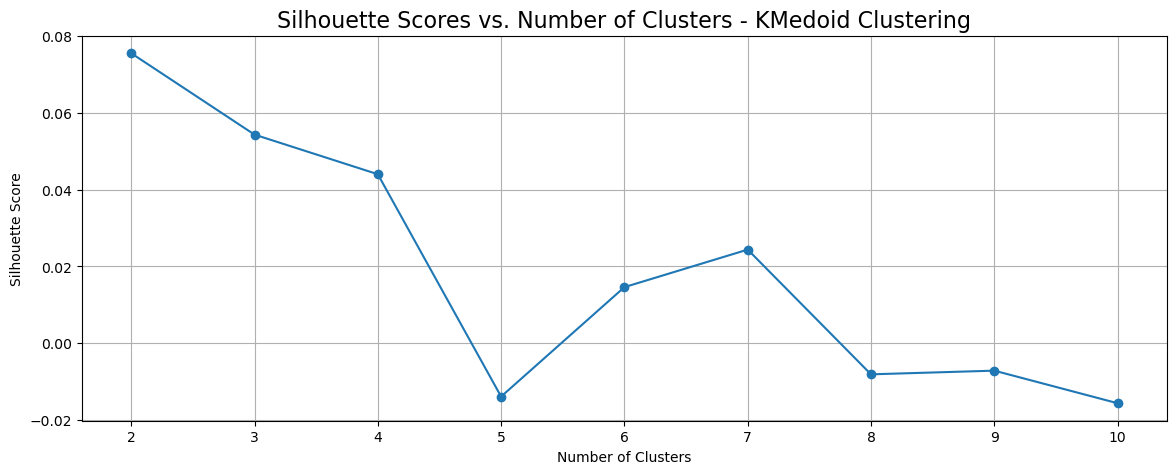

In [30]:
silhouette_scores = []

for k in range(2, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    labels = kmedoids.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(14,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores vs. Number of Clusters - KMedoid Clustering", fontsize=16)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### Silhoutte score for KMedoids:
##### cluster 2=    0.08,   cluster 3=     0.055

Clusters are not well separated.

There's significant overlap between groups.

The clustering structure is weak in the current feature space or with the K-Medoids approach.

Compared to KMeans and t-SNE, which yielded silhouette scores above 0.4 (for cluster 3), K-Medoids underperforms here.

## t-SNE is excellent for visualizing complex or overlapping clusters
It’s a method that transforms high-dimensional data into a low-dimensional space (usually 2D or 3D) while trying to preserve the local structure (i.e., points that are close in high-dimensional space remain close in low-dimensional space).

t-SNE is applied on the pca transformed data - as PCA removes some noise and redundant information, which can help t-SNE focus on the most meaningful variance. T-SNE is computationally expensive, reducing the number of features beforehand speeds up the process. PCA can improve the stability and reproducibility of t-SNE results by starting with a more structured representation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


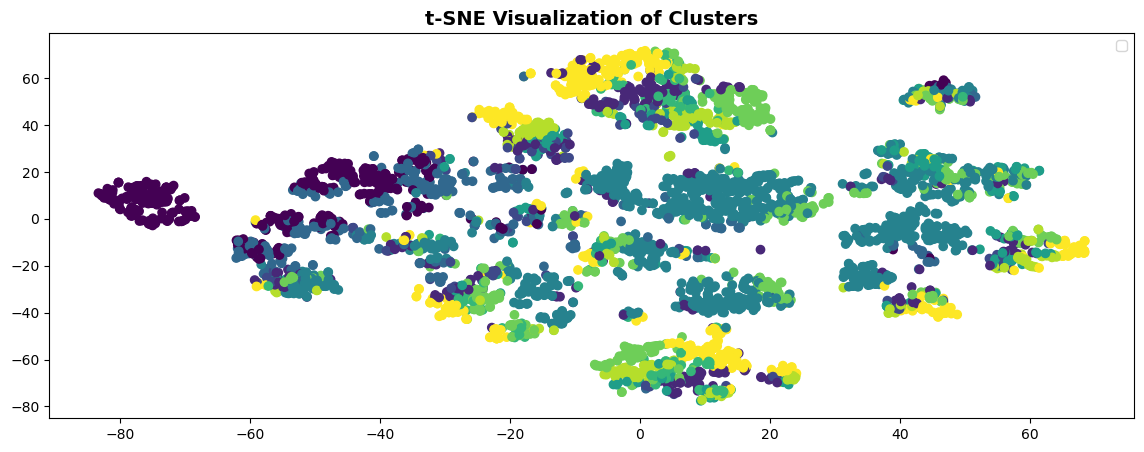

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(14,5))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title("t-SNE Visualization of Clusters", fontsize=14, weight='bold')
plt.legend()
plt.show()

### KMeans clustering on the t-SNE Data

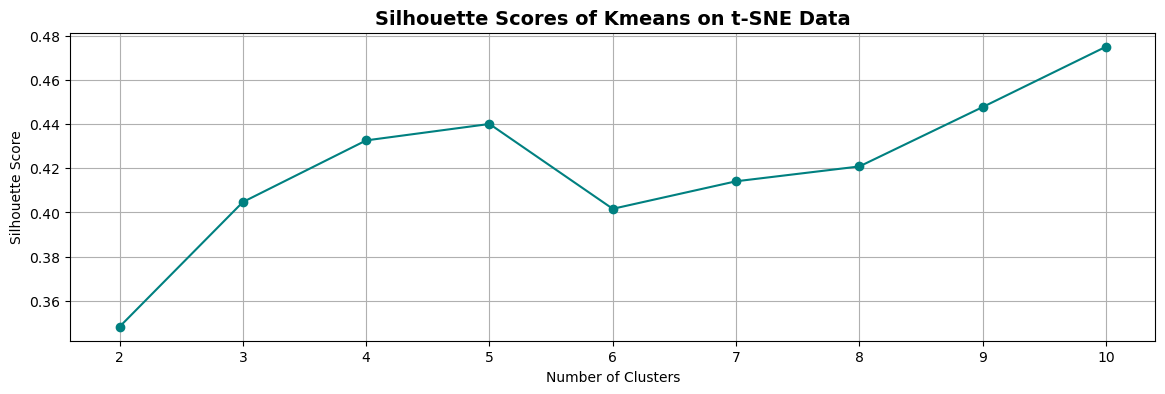

In [35]:
silhouette_scores_tsne = []

# Try clustering with different numbers of clusters on t-SNE data
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, labels)
    silhouette_scores_tsne.append(score)

# Plot the silhouette scores
plt.figure(figsize=(14, 4))
plt.plot(range(2, 11), silhouette_scores_tsne, marker='o', color='teal')
plt.title("Silhouette Scores of Kmeans on t-SNE Data", fontsize=14, weight='bold')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### t-SNE Silhoutte score:
Clusters 2: 0.15,   Clusters 3: 0.40,   Clsuters 4: 0.43,   Clusters 5: 0.44,   clusters 10: 0.48

Score increases as clusters increase, suggesting better-defined groupings.

Best score = 0.48 at 10 clusters, clustering structure becomes clearer in high-k.

Low score at 2 (0.15), indicates overlapping groups or weak separation with only 2 clusters.


# Autoencoders
Autoencoders learn a compressed, non-linear latent representation of the data, which can often make clusters more separable compared to PCA or raw data.
Autoencoder compresses input data to a learned lower-dimensional representation.  Clustering is then performed in this nonlinear latent space, which can improve cluster quality.  

### Build the Autoencoder using TensorFlow/Keras:

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Define the dimensions
input_dim = X.shape[1]
encoding_dim = 10 

# Define layers
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Define autoencoder and encoder models
autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=latent)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

### Train the Autoencoder

In [40]:
autoencoder.fit(X, X, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9108 - val_loss: 0.4900
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4379 - val_loss: 0.3434
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3167 - val_loss: 0.2892
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2663 - val_loss: 0.2462
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2348 - val_loss: 0.2217
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2086 - val_loss: 0.2026
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1868 - val_loss: 0.1874
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1756 - val_loss: 0.1790
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1704 - val_loss: 0.1665
Epoch 10/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1566 - val_loss: 0.1566
Epoch 11/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1482 - val_loss: 0.1527
Epoch 12/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

### Extract Latent Representations

In [42]:
X_latent = encoder.predict(X)  # This is your new clustering space


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Apply KMeans on Latent Space

Silhouette Score (Autoencoder Latent Space): 0.26288506


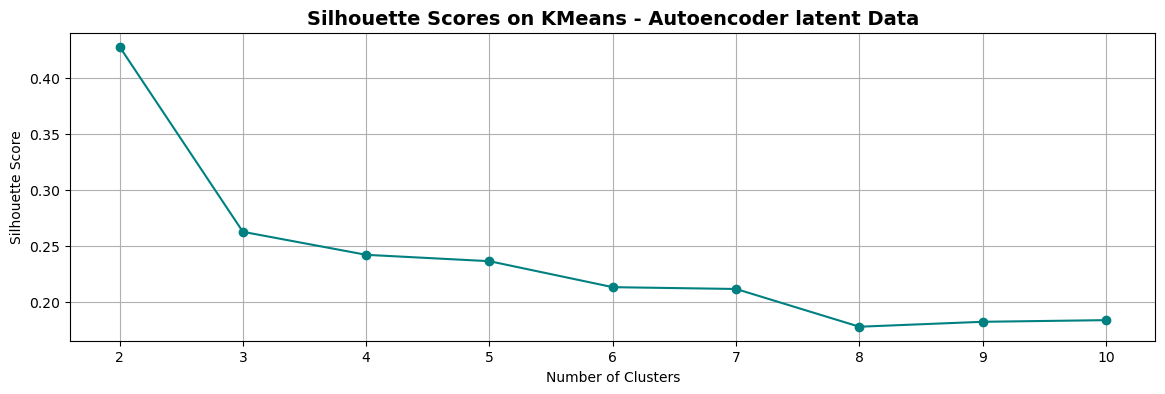

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_latent)

silhouette = silhouette_score(X_latent, labels)
print("Silhouette Score (Autoencoder Latent Space):", silhouette)

silhouette_scores_autoencoder= []

# Try clustering with different numbers of clusters on t-SNE data
for k in range(2, 11):
    kmeans_autoencoder = KMeans(n_clusters=k, random_state=42)
    labels_autoencoder = kmeans_autoencoder.fit_predict(X_latent)
    score = silhouette_score(X_latent, labels_autoencoder)
    silhouette_scores_autoencoder.append(score)

# Plot the silhouette scores
plt.figure(figsize=(14, 4))
plt.plot(range(2, 11), silhouette_scores_autoencoder, marker='o', color='teal')
plt.title("Silhouette Scores on KMeans - Autoencoder latent Data", fontsize=14, weight='bold')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### Visualize Autoencoder Embeddings with t-SNE

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


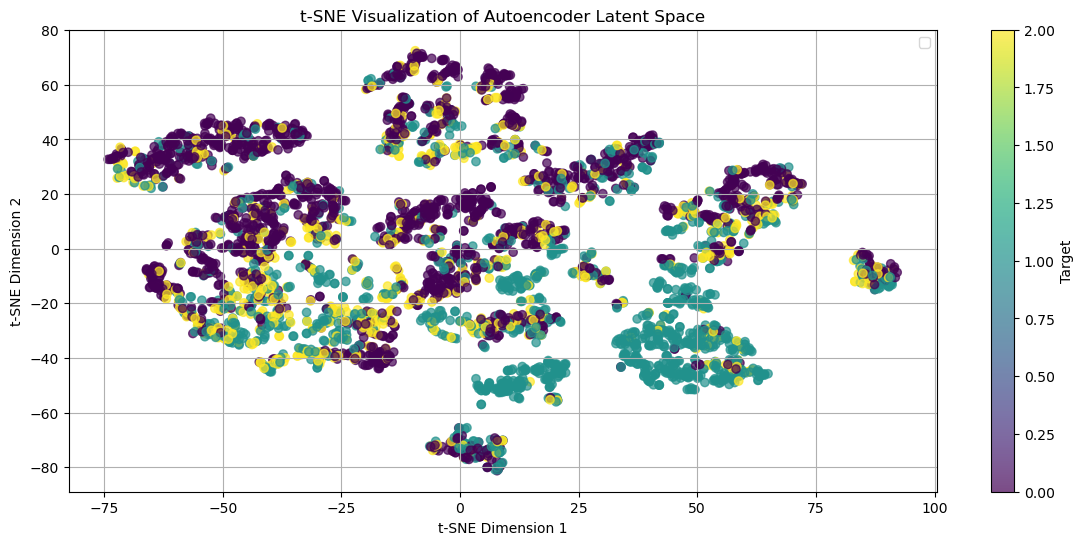

In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE on latent space
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
latent_features = encoder.predict(X)
tsne_results = tsne.fit_transform(latent_features)  


# Plotting
plt.figure(figsize=(14, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Target')
plt.title("t-SNE Visualization of Autoencoder Latent Space")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.legend()
plt.show()

### Autoencoder Embedding Visualization (2D Representation)
Each point in the plot represents an individual student, projected into a 2D space using the compressed latent features learned by the Autoencoder. The colors correspond to the original target classes — Graduate, Dropout, and Enrolled.

Despite dimensionality reduction and deep feature extraction, the clusters continue to show significant overlap. This further reinforces the observation that the classes are not linearly separable. Many feature patterns (such as course completion, financial aid, or academic performance) are common across different outcomes, reflecting the inherent complexity and ambiguity within the dataset. The overlapping patterns indicate that even sophisticated models struggle to draw clear boundaries between the student outcomes based solely on the available features.

## Conclusion

Two clustering methods were explored: K-Means, K-Medoids, on the PCA and t-SNE and Autoencoder. Among them, K-Means on the PCA, t-SNE and Autoencoder data achieved a silhouette score of approximately 0.40 for 3 clusters, indicating a moderate clustering structure. However, the corresponding cluster plots reveal significant overlap among the classes, suggesting that the current feature space does not offer strong separability. 

Silhouette Score of 0.40 suggests that the clusters in the Autoencoder latent space are not perfectly distinct. While it's better than random clustering (which would have a negative score or near zero), it indicates that the clustering isn't very tight or well-separated. A score closer to 1 would indicate better-defined clusters.

This overlap reflects the intrinsic nature of the dataset, where feature patterns are shared across different student outcomes — Graduate, Dropout, and Enrolled. For instance, students with high academic performance, financial support, or scholarships may still end up in any of the three categories due to personal, administrative, or circumstantial reasons. As a result, even informative features may not reliably differentiate the target labels, leading to mixed clusters and low silhouette scores, especially for K-Medoids.

This analysis underscores the complexity and ambiguity in modeling student outcomes using unsupervised techniques and highlights the need for either more discriminative features, temporal behavior modeling, or a supervised approach to better capture the nuances of student trajectories.

In [48]:
students_df['KMeans_clusters'] = y_pred_kmeans

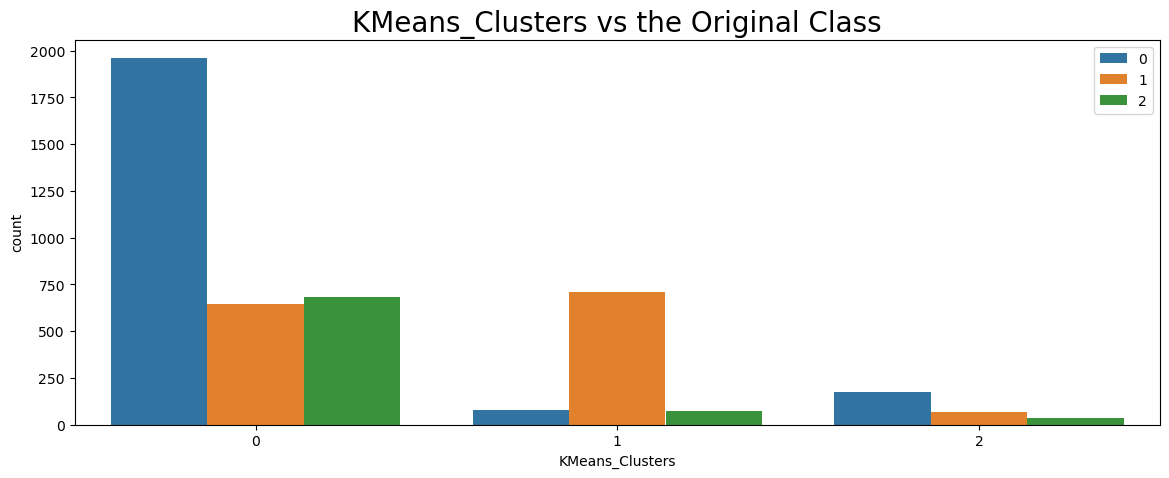

In [49]:
plt.figure(figsize=(14,5))
sns.countplot(students_df, x='KMeans_clusters', hue='Target')
plt.title("KMeans_Clusters vs the Original Class", fontsize=20)
plt.xlabel("KMeans_Clusters")
plt.legend()
plt.show()

In [50]:
students_df['KMeans_clusters'].value_counts()

KMeans_clusters
0    3291
1     858
2     275
Name: count, dtype: int64

### Value counts of the KMeans Clusters:
0:	4037	This is the dominant cluster, containing the vast majority of students. It likely contains a mixture of all target classes, showing high class overlap.

2:	280	A smaller, more specific cluster, possibly identifying a subgroup of students with distinct patterns.

1:	107	The smallest cluster, likely capturing outliers or a very specialized group of students.

### Cluster analysis - KMeans vs Target( Original classes)

In [53]:
cluster_analysis_df = pd.DataFrame({
    "Target": y,
    "KMeans_clusters": y_pred_kmeans
})

# Group by KMeans cluster and compute value counts for satisfaction levels
cluster_mapping = cluster_analysis_df.groupby("KMeans_clusters")["Target"].value_counts()
cluster_mapping

KMeans_clusters  Target
0                0         1961
                 2          683
                 1          647
1                1          707
                 0           76
                 2           75
2                0          172
                 1           67
                 2           36
Name: count, dtype: int64

### KMeans Cluster analysis vs Target classes:

From the KMeans cluster assignment, it is evident that a significant majority of the students — including those in the Graduate class (1,961 students) — are assigned to Cluster 0. In contrast, only a small fraction of the same class are assigned to Cluster 1 (76) and Cluster 2 (172). A similar distribution pattern is observed for the Dropout and Enrolled classes.

This imbalance in cluster membership indicates that the clustering algorithm predominantly grouped most data points into a single cluster, suggesting a lack of well-separated structure in the underlying feature space.

These findings are consistent with earlier experiments and visualizations (PCA, t-SNE, Autoencoder), which showed significant overlap across the target classes. This reinforces the conclusion that the behavioral and academic features of students across the Graduate, Dropout, and Enrolled categories exhibit substantial similarities, making them challenging to separate naturally using unsupervised methods.

### KMeans Cluster analysis based on the feature characteristics:

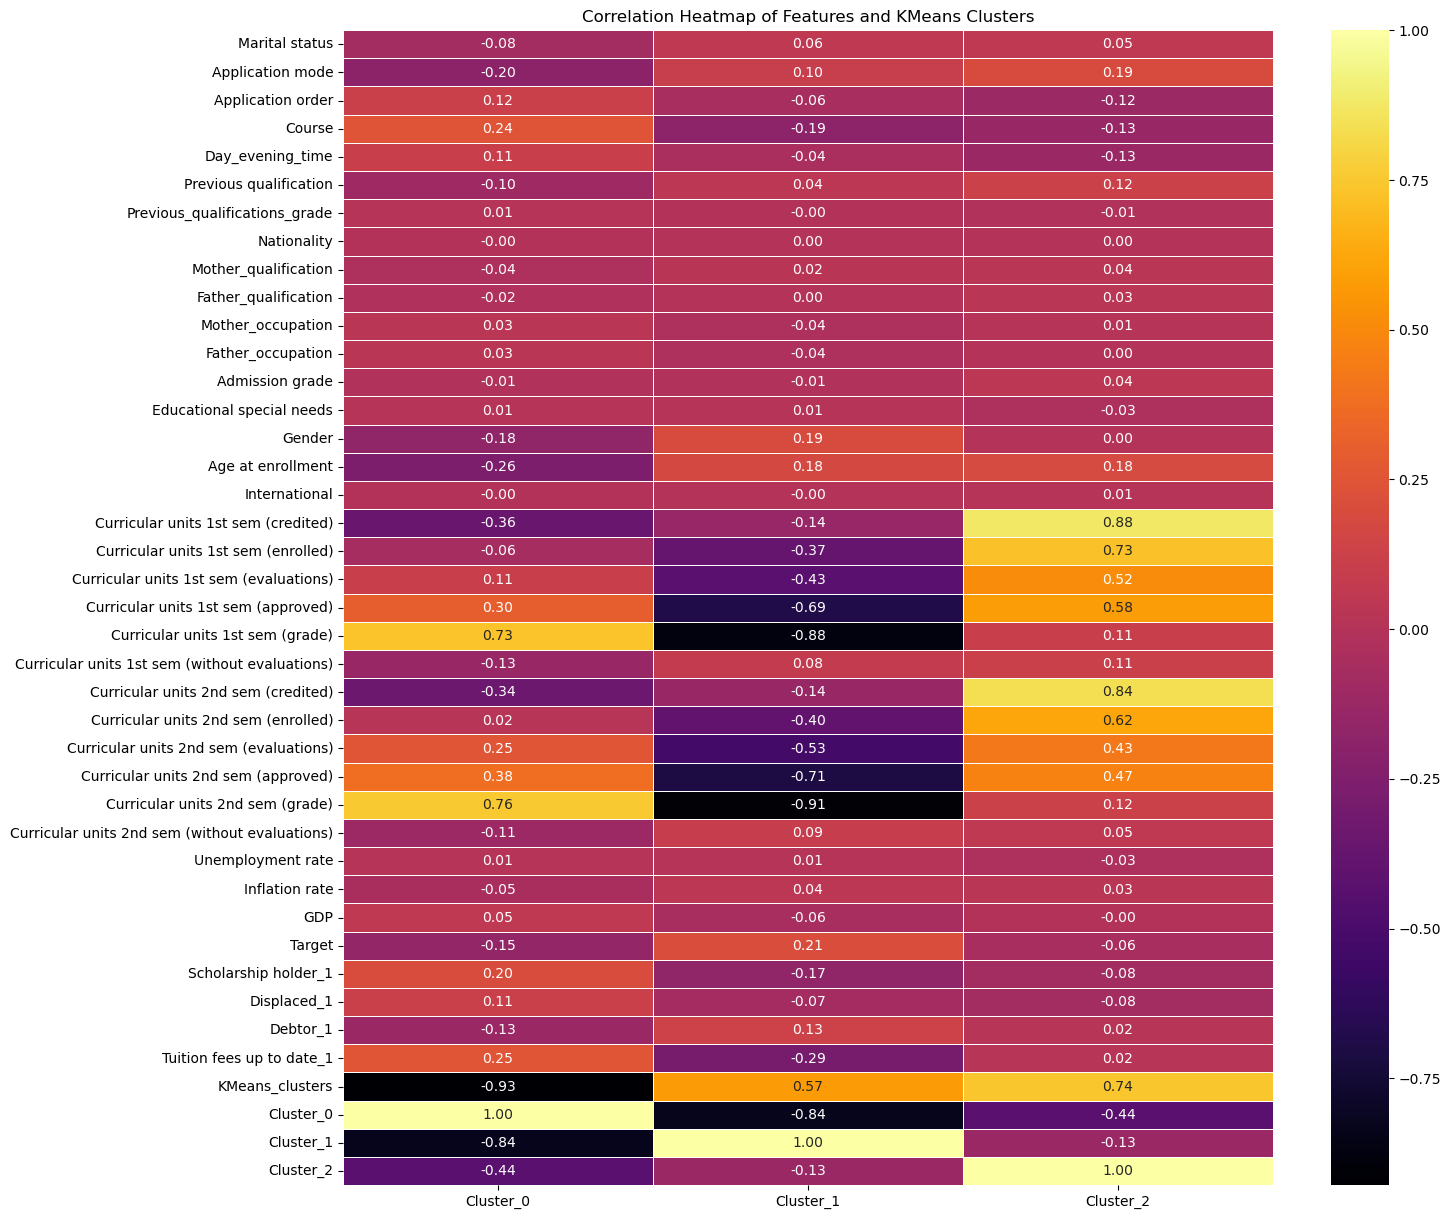

In [55]:
features = students_df

encoded_clusters = pd.get_dummies(students_df["KMeans_clusters"], prefix = "Cluster")

combined = pd.concat([features, encoded_clusters], axis=1)

correlation_matrix = combined.corr()

cluster_correlation = correlation_matrix.loc[:, encoded_clusters.columns]

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(cluster_correlation, annot=True, cmap="inferno", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features and KMeans Clusters")
plt.show()

s.

## KMeans Cluster Interpretation Based on Feature Characteristics
The KMeans clustering results reveal three distinct natural groupings of students based on the correlation of features within the dataset:

### Cluster 2: Academically Strong Students
Strong positive correlation with key academic features:  1st and 2nd semester credited units, Enrolled units, Evaluations, Approved units, Grades. 
Other features (demographic, macroeconomic) show low correlation.  This cluster represents students with strong academic performance. Academic factors are the primary drivers for this group.

### Cluster 0: Academic and financial aspects 
Strong positive correlation with certain academic features like "approved" and "grade" etc.. and have mild positive correlation with Financial factors. 

### Cluster 1: Underperforming Students
Strong negative correlation with the same academic features that define Cluster 2 and Cluster 0.  Likely represents struggling or at-risk students, primarily defined by poor academic indicators.

# Conclusion:
Clustering and target class analysis confirm that academic performance is the primary driver of group separation followed by financial aspects. The demographic, and macroeconomic features contribute minimally, offering limited predictive value.
The Enrolled class (Target 2) lacks distinct feature patterns and overlaps significantly with both Graduates and Dropouts. This overlap introduces noise, leading to poor model performance (low precision, recall, and F1-score for Enrolled), despite strong results for the other two classes. 
The findings reflect the heterogeneous and complex nature of student data, where only academic and financial features consistently drive separability. The classification is simplified by removing the Enrolled class and frame as Binary Task to focus on Graduates vs. Dropouts to improve model accuracy.

# Next Steps & Recommendation: Binary Classification: (Graduate and Dropout):
1. Simplify the Classification Task:  Removed the Enrolled class (Target 2) from the dataset. It adds noise and overlaps heavily with other classes.
Lacks unique signal in both clustering and correlation analysis.

2. Reframe the Problem as Binary Classification:  Focussed on distinguishing Graduates (Target 0) vs. Dropouts (Target 1).  This simplification helps ML models focus on meaningful differences and improves prediction accuracy.

3. Train and Evaluate ML Models: Used classification models like Random Forest, XGBoost, SVM, Neural Networks. Split dataset into training and testing sets (stratified). Evaluated using F1-score, ROC-AUC, Confusion Matrix.

In [58]:
students_df

Marital status  Application mode  Application order  Course  \
0                  0                 7                  5       1   
1                  0                 5                  1      10   
2                  0                 0                  5       4   
3                  0                 7                  2      14   
4                  1                11                  1       2   
...              ...               ...                ...     ...   
4419               0                 0                  6      14   
4420               0                 0                  2      14   
4421               0                 0                  1      11   
4422               0                 0                  1       8   
4423               0                 4                  1      14   

      Day_evening_time  Previous qualification  Previous_qualifications_grade  \
0                    1                       0                          122.0   
1                    1                       0                          160.0   
2                    1                       0                          122.0   
3                    1                       0                          122.0   
4                    0                       0                          100.0   
...                ...                     ...                            ...   
4419                 1                       0                          125.0   
4420                 1                       0                          120.0   
4421                 1                       0                          154.0   
4422                 1                       0                          180.0   
4423                 1                       0                          152.0   

      Nationality  Mother_qualification  Father_qualification  \
0               0                    12                     9   
1               0                     0                     2   
2               0                    21                    26   
3               0                    22                    26   
4               0                    21                    27   
...           ...                   ...                   ...   
4419            0                     0                     0   
4420           18                     0                     0   
4421            0                    21                    26   
4422            0                    21                    26   
4423            8                    22                    26   

      Mother_occupation  Father_occupation  Admission grade  \
0                     5                  9            127.3   
1                     3                  3            142.5   
2                     9                  9            124.8   
3                     5                  3            119.6   
4                     9                  9            141.5   
...                 ...                ...              ...   
4419                  5                  4            122.2   
4420                  9                  9            119.0   
4421                  9                  9            149.5   
4422                  7                  4            153.8   
4423                  5                  9            152.0   

      Educational special needs  Gender  Age at enrollment  International  \
0                             0       1                 20              0   
1                             0       1                 19              0   
2                             0       1                 19              0   
3                             0       0                 20              0   
4                             0       0                 45              0   
...                         ...     ...                ...            ...   
4419                          0       1                 19              0   
4420                          0       0           

# Experiment 10: Binary Classification: (Graduate and Dropout):
Based on the above findings, the 'Enrolled'cclass in the Target is dropped and only Graduate and Dropout is retained only. Machine Learning models are applied and based on their performance, the best models would be identified for the prediction.

In [60]:
students_df = students_df.drop(columns=["KMeans_clusters"])
new_students_df = students_df[students_df["Target"].isin([0, 1])]


In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import warnings
from collections import Counter
from imblearn.over_sampling import ADASYN 
from imblearn.under_sampling import NearMiss

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [62]:
new_students_df.head()

Marital status  Application mode  Application order  Course  \
0               0                 7                  5       1   
1               0                 5                  1      10   
2               0                 0                  5       4   
3               0                 7                  2      14   
4               1                11                  1       2   

   Day_evening_time  Previous qualification  Previous_qualifications_grade  \
0                 1                       0                          122.0   
1                 1                       0                          160.0   
2                 1                       0                          122.0   
3                 1                       0                          122.0   
4                 0                       0                          100.0   

   Nationality  Mother_qualification  Father_qualification  Mother_occupation  \
0            0                    12                     9                  5   
1            0                     0                     2                  3   
2            0                    21                    26                  9   
3            0                    22                    26                  5   
4            0                    21                    27                  9   

   Father_occupation  Admission grade  Educational special needs  Gender  \
0                  9            127.3                          0       1   
1                  3            142.5                          0       1   
2                  9            124.8                          0       1   
3                  3            119.6                          0       0   
4                  9            141.5                          0       0   

   Age at enrollment  International  Curricular units 1st sem (credited)  \
0                 20              0                                    0   
1                 19              0                                    0   
2                 19              0                                    0   
3                 20              0                                    0   
4                 45              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0   

In [63]:
# Rename the columns to remove any special characters like parentheses or spaces
new_students_df = new_students_df.rename(columns={
    'Marital status': 'Marital_status',
    'Application mode': 'Application_mode',
    'Application order': 'Application_order',
    'Previous qualification': 'Previous_qualification',
    'Admission grade' : 'Admission_grade',
    'Educational special needs' : 'Educational_special_needs',
    'Tuition fees up to date' : 'Tuition_fees_up_to_date',
    'Scholarship holder' : 'Scholarship_holder',
    'Age at enrollment' : 'Age_at _enrollment',
    'Curricular units 1st sem (credited)' : 'Units_1st_sem_credited',
    'Curricular units 1st sem (enrolled)' : 'Units_1st_sem_enrolled',
    'Curricular units 1st sem (evaluations)' : 'Units_1st_sem_evaluations',
    'Curricular units 1st sem (approved)' : 'Units_1st_sem_approved',
    'Curricular units 1st sem (grade)' : 'Units_1st_sem_grade',
    'Curricular units 1st sem (without evaluations)' : 'Units_1st_sem_no_evaluations',
    'Curricular units 2nd sem (credited)' : 'Units_2nd_sem_credited',
    'Curricular units 2nd sem (enrolled)' : 'Units_2nd_sem_enrolled',
    'Curricular units 2nd sem (evaluations)' : 'Units_2nd_sem_evaluations',
    'Curricular units 2nd sem (approved)' : 'Units_2nd_sem_approved',
    'Curricular units 2nd sem (grade)' : 'Units_2nd_sem_grade',
    'Curricular units 2nd sem (without evaluations)' : 'Units_2nd_sem_no_evaluations',
    'Tuition fees up to date_1' : 'Tuition_fees_up_to_date_1',
    'Inflation rate' : 'Inflation_rate',
    'Unemployment rate' : 'Unemployment_rate',
    'Scholarship holder_1' : 'Scholarship_holder_1'
   
})

In [64]:
new_students_df.head()

Marital_status  Application_mode  Application_order  Course  \
0               0                 7                  5       1   
1               0                 5                  1      10   
2               0                 0                  5       4   
3               0                 7                  2      14   
4               1                11                  1       2   

   Day_evening_time  Previous_qualification  Previous_qualifications_grade  \
0                 1                       0                          122.0   
1                 1                       0                          160.0   
2                 1                       0                          122.0   
3                 1                       0                          122.0   
4                 0                       0                          100.0   

   Nationality  Mother_qualification  Father_qualification  Mother_occupation  \
0            0                    12                     9                  5   
1            0                     0                     2                  3   
2            0                    21                    26                  9   
3            0                    22                    26                  5   
4            0                    21                    27                  9   

   Father_occupation  Admission_grade  Educational_special_needs  Gender  \
0                  9            127.3                          0       1   
1                  3            142.5                          0       1   
2                  9            124.8                          0       1   
3                  3            119.6                          0       0   
4                  9            141.5                          0       0   

   Age_at _enrollment  International  Units_1st_sem_credited  \
0                  20              0                       0   
1                  19              0                       0   
2                  19              0                       0   
3                  20              0                       0   
4                  45              0                       0   

   Units_1st_sem_enrolled  Units_1st_sem_evaluations  Units_1st_sem_approved  \
0                       0                          0                       0   
1                       6                          6                       6   
2                       6                          0                       0   
3                       6                          8                       6   
4                       6                          9                       5   

   Units_1st_sem_grade  Units_1st_sem_no_evaluations  Units_2nd_sem_credited  \
0             0.000000                             0                       0   
1            14.000000                             0                       0   
2             0.000000                             0                       0   
3            13.428571                             0                       0   
4            12.333333                             0                       0   

   Units_2nd_sem_enrolled  Units_2nd_sem_evaluations  Units_2nd_sem_approved  \
0                       0                          0                       0   
1                       6                          6                       6   
2                       6                          0                       0   
3                       6                         10                       5   
4                       6                          6                       6   

   Units_2nd_sem_grade  Units_2nd_sem_no_evaluations  Unemployment_rate  \
0             0.000000                             0               10.8   
1            13.666667                             0               13.9   
2             0.000000                             0               10.8   
3            12.400000                             0             

### Defining X and y

In [66]:
# X = new_students_df.drop(columns=["Target", "Previous_qualifications_grade", "Admission grade"])

X = new_students_df.drop(columns=["Target"])
y = new_students_df["Target"]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## ML (Default parameters) with Graduate and Dropout classes:
##### # Define classifiers for ML models

In [69]:
classifiers = {
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    }

###  Train and evaluate ML model classifiers:


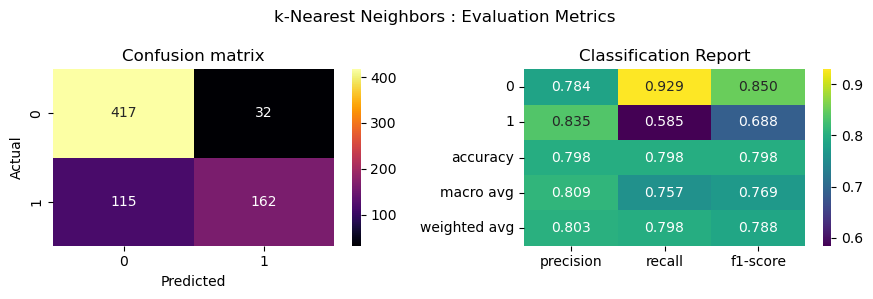

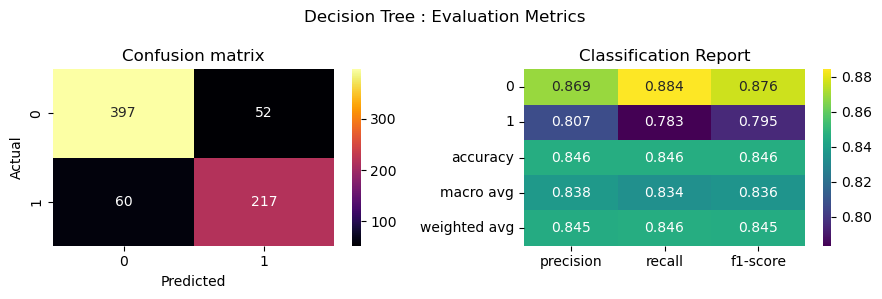

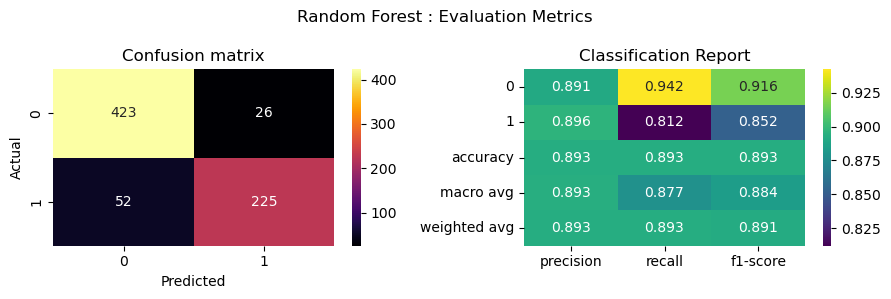

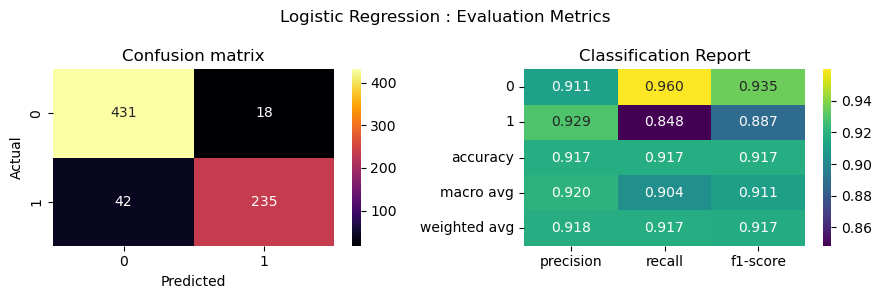

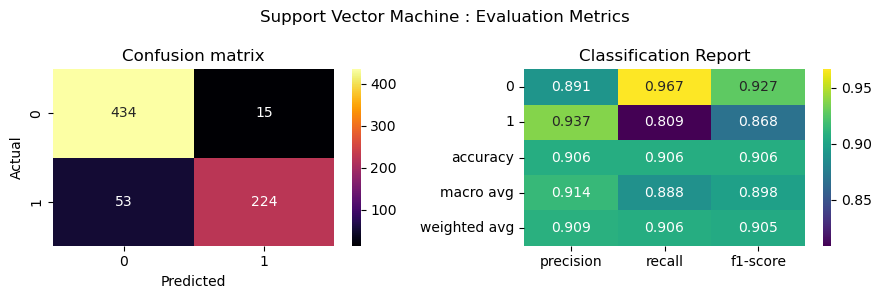

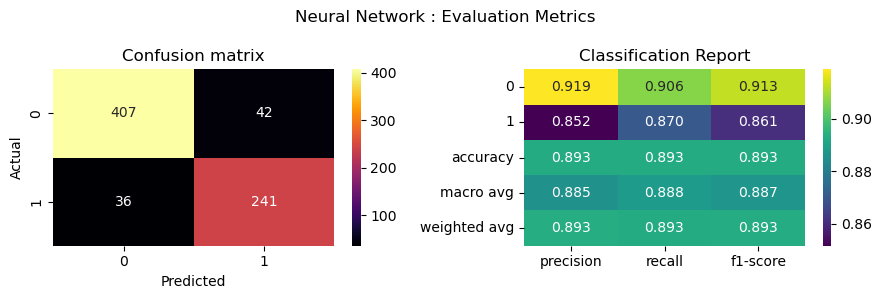

In [71]:
results = []
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
   # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Individual F1-scores
    f1_class_0 = report['0']['f1-score']
    f1_class_1 = report['1']['f1-score']

    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_weighted = report['weighted avg']['f1-score']
    
    # Append results
    results.append([name, accuracy, precision, recall, f1_weighted, f1_class_0, f1_class_1])

    # visualisations
    plt.figure(figsize=(9,3))
    plt.suptitle(f"{name} : Evaluation Metrics")

    #Confusion matrix heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", cmap="inferno")
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    #classification report heatmap
    plt.subplot(1, 2, 2)
    report_df = pd.DataFrame(report).iloc[:-1, :].T
    sns.heatmap(report_df, annot=True, fmt=".3f", cmap="viridis")
    plt.title("Classification Report")
    plt.tight_layout()
    plt.show()    

    


### Model Performance Metrics on Test Set of ML models applied with default parameters: 


In [73]:
default_param_results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Weighted F1 Score", "F1 Score (Class 0)", "F1 Score (Class 1)"])
print("Model Performance Metrics on Test Set of ML models applied with default parameters:")


pd.set_option("display.max_colwidth", None)  # Show full column width
pd.set_option("display.max_columns", None)   # Show all columns
pd.set_option("display.width", None)         # Prevent line breaks

default_param_results_df

Model Performance Metrics on Test Set of ML models applied with default parameters:


Model  Accuracy  Precision    Recall  Weighted F1 Score  \
0     k-Nearest Neighbors  0.797521   0.803376  0.797521           0.788246   
1           Decision Tree  0.845730   0.845047  0.845730           0.845281   
2           Random Forest  0.892562   0.892773  0.892562           0.891428   
3     Logistic Regression  0.917355   0.917939  0.917355           0.916560   
4  Support Vector Machine  0.906336   0.908747  0.906336           0.904789   
5          Neural Network  0.892562   0.893117  0.892562           0.892776   

   F1 Score (Class 0)  F1 Score (Class 1)  
0            0.850153            0.687898  
1            0.876380            0.794872  
2            0.915584            0.852273  
3            0.934924            0.886792  
4            0.927350            0.868217  
5            0.912556            0.860714

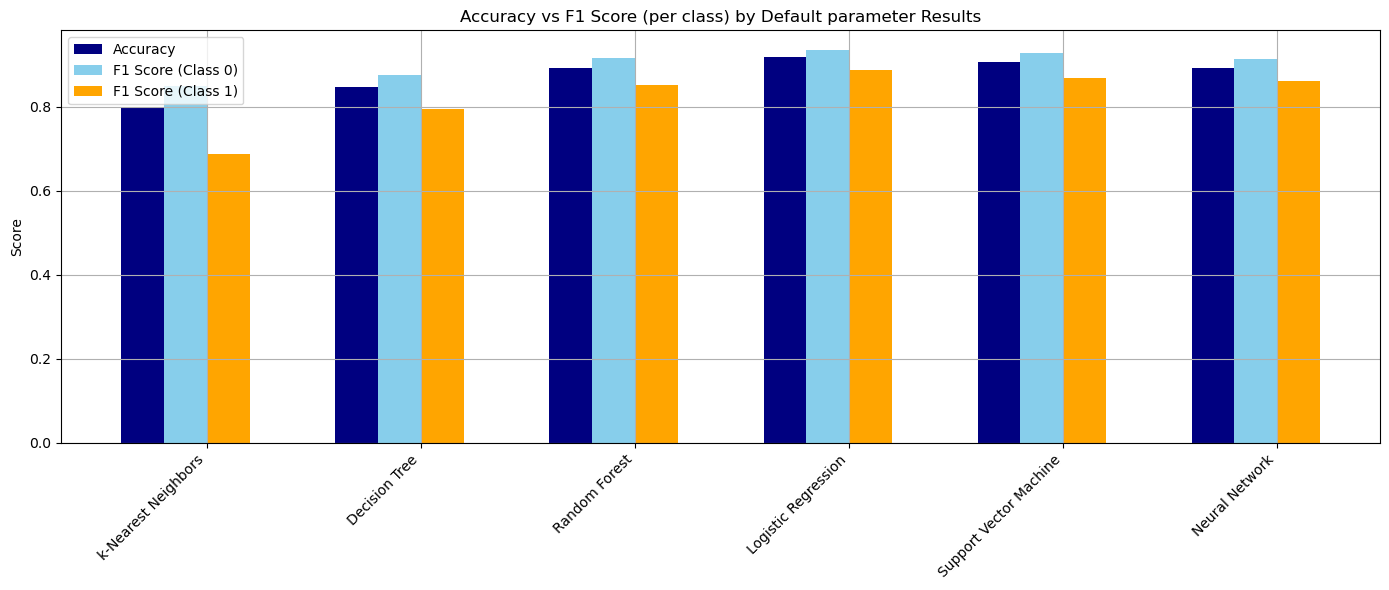

In [74]:
models = default_param_results_df["Model"]
accuracy = default_param_results_df["Accuracy"]
f1_score_0 = default_param_results_df["F1 Score (Class 0)"]
f1_score_1 = default_param_results_df["F1 Score (Class 1)"]

x = np.arange(len(models))  # the label locations
width = 0.2  # narrower width for 4 bars

plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='navy')
plt.bar(x - 0.5*width, f1_score_0, width, label='F1 Score (Class 0)', color='skyblue')
plt.bar(x + 0.5*width, f1_score_1, width, label='F1 Score (Class 1)', color='orange')

plt.ylabel('Score')
plt.title('Accuracy vs F1 Score (per class) by Default parameter Results')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

###  Algorithm Performance on Test Set & Evaluation
The following are the top-performing machine learning models on the test set, evaluated using default parameters:

1. Logistic Regression:  Accuracy: 92%

Performance: Consistently high precision, recall, and F1 Score.  Best overall performer; simple, interpretable, and robust.

2. Support Vector Machine (SVM):  Accuracy: 91%,  F1 Score: 91%

Strong generalization and excellent boundary definition.

3. Random Forest & Neural Network (MLPClassifier):  Accuracy: 89%, F1 Score: 89%

Remarks: Both models showed solid results; Random Forest adds feature importance interpretability, while Neural Network captures non-linear patterns.

## Next step: ML Models (GridSearchCV Hyperparameters) with Graduate and Dropout classes

In [76]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

###  Hyperparameter grids for each classifier


In [78]:
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ['lbfgs', 'liblinear'],
        "penalty": ['l2']
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "k-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']     #The "algorithm" parameter in the KNeighborsClassifier controls how the nearest neighbors search is performed. It determines the method used to compute distances between points in the feature space and find the nearest neighbors. There are four options for the "algorithm"
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf'],
        "gamma": ['scale', 'auto']
    },

    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50)],     # (50,) → A network with 1 hidden layer of 50 neurons. (100,) → A network with 1 hidden layer of 100 neurons. (50,) → A network with 1 hidden layer of 50 neurons (same as the first one).
        "activation": ['sigmoid', 'relu'],
        "solver": ['adam', 'sgd'],
        "learning_rate": ['constant', 'adaptive']       # 'constant': The learning rate remains fixed throughout training. It doesn’t change., 'adaptive': The learning rate starts at a given value and decreases over time if the model's performance plateaus (i.e., when the model is no longer improving after a set number of iterations).
    }
}

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3630, 36), (3630,), (2904, 36), (2904,), (726, 36), (726,))

###  GridSearchCV for each classifier


Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


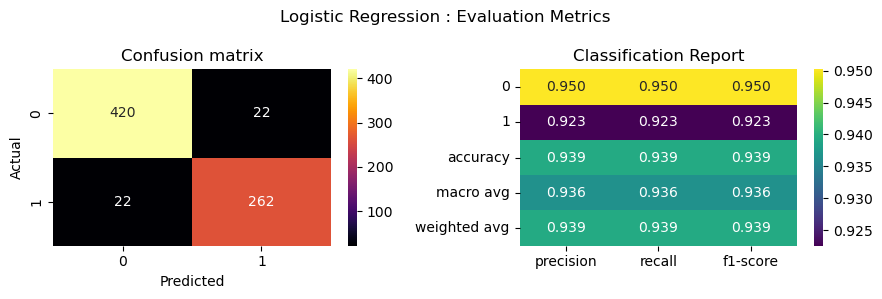

Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


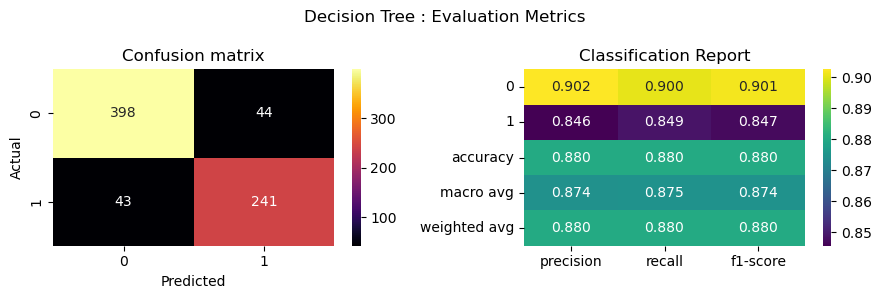

Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


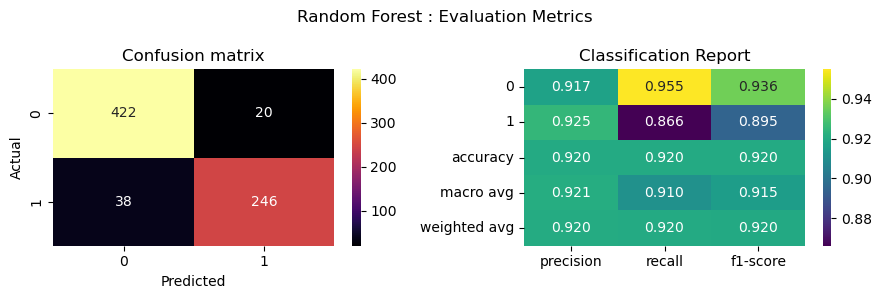

Running GridSearchCV for k-Nearest Neighbors...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


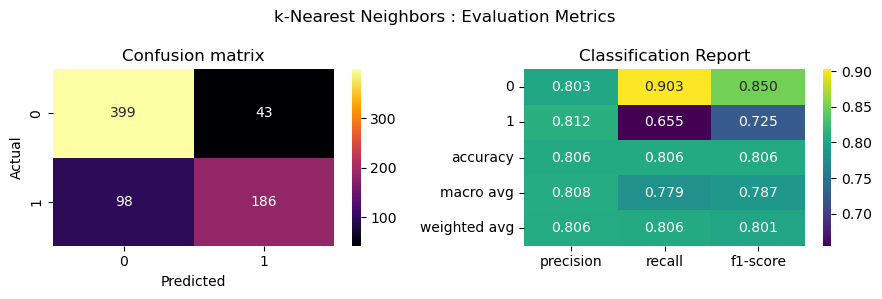

Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


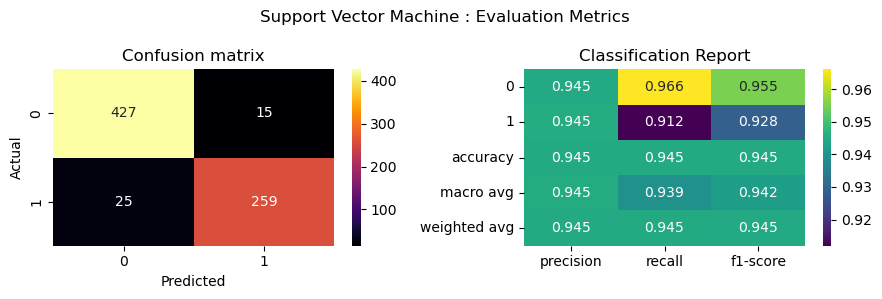

Running GridSearchCV for Neural Network...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


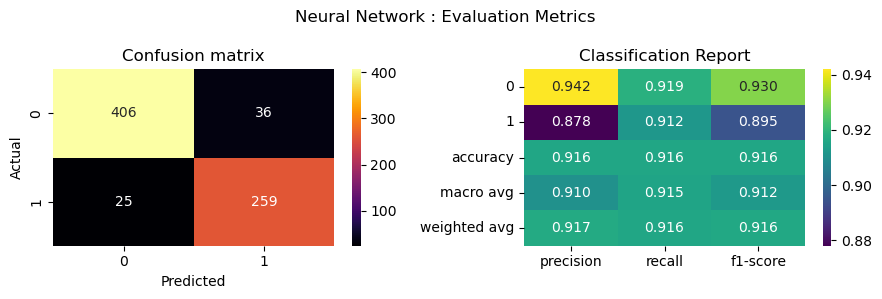

In [81]:
results = []
for name, classifier in classifiers.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], cv = 5, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predict on the test set with the best model
    y_pred = best_model.predict(X_test)
    
# Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Individual F1-scores
    f1_class_0 = report['0']['f1-score']
    f1_class_1 = report['1']['f1-score']

    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_weighted = report['weighted avg']['f1-score']
    
    # Append results
    results.append([name, accuracy, precision, recall, f1_weighted, f1_class_0, f1_class_1, grid_search.best_params_])

    # visualisations
    plt.figure(figsize=(9,3))
    plt.suptitle(f"{name} : Evaluation Metrics")

    #Confusion matrix heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", cmap="inferno")
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    #classification report heatmap
    plt.subplot(1, 2, 2)
    report_df = pd.DataFrame(report).iloc[:-1, :].T
    sns.heatmap(report_df, annot=True, fmt=".3f", cmap="viridis")
    plt.title("Classification Report")
    plt.tight_layout()
    plt.show()
    
    

In [82]:
best_parameters = grid_search.best_params_

In [83]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Weighted F1 Score", "F1 Score (Class 0)", "F1 Score (Class 1)", "Best Parameters"])
print("Model Performance Metrics on Test Set of ML models applied with GridSearchCV Hyperparameters:")


pd.set_option("display.max_colwidth", None)  # Show full column width
pd.set_option("display.max_columns", None)   # Show all columns
pd.set_option("display.width", None)         # Prevent line breaks

results_df

Model Performance Metrics on Test Set of ML models applied with GridSearchCV Hyperparameters:


Model  Accuracy  Precision    Recall  Weighted F1 Score  \
0     Logistic Regression  0.939394   0.939394  0.939394           0.939394   
1           Decision Tree  0.880165   0.880244  0.880165           0.880203   
2           Random Forest  0.920110   0.920294  0.920110           0.919600   
3     k-Nearest Neighbors  0.805785   0.806498  0.805785           0.801062   
4  Support Vector Machine  0.944904   0.944911  0.944904           0.944718   
5          Neural Network  0.915978   0.916948  0.915978           0.916247   

   F1 Score (Class 0)  F1 Score (Class 1)  \
0            0.950226            0.922535   
1            0.901472            0.847100   
2            0.935698            0.894545   
3            0.849840            0.725146   
4            0.955257            0.928315   
5            0.930126            0.894646   

                                                                                       Best Parameters  
0                                                     {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}  
1                                     {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}  
2               {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}  
3                                                              {'algorithm': 'auto', 'n_neighbors': 3}  
4                                                      {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}  
5  {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}

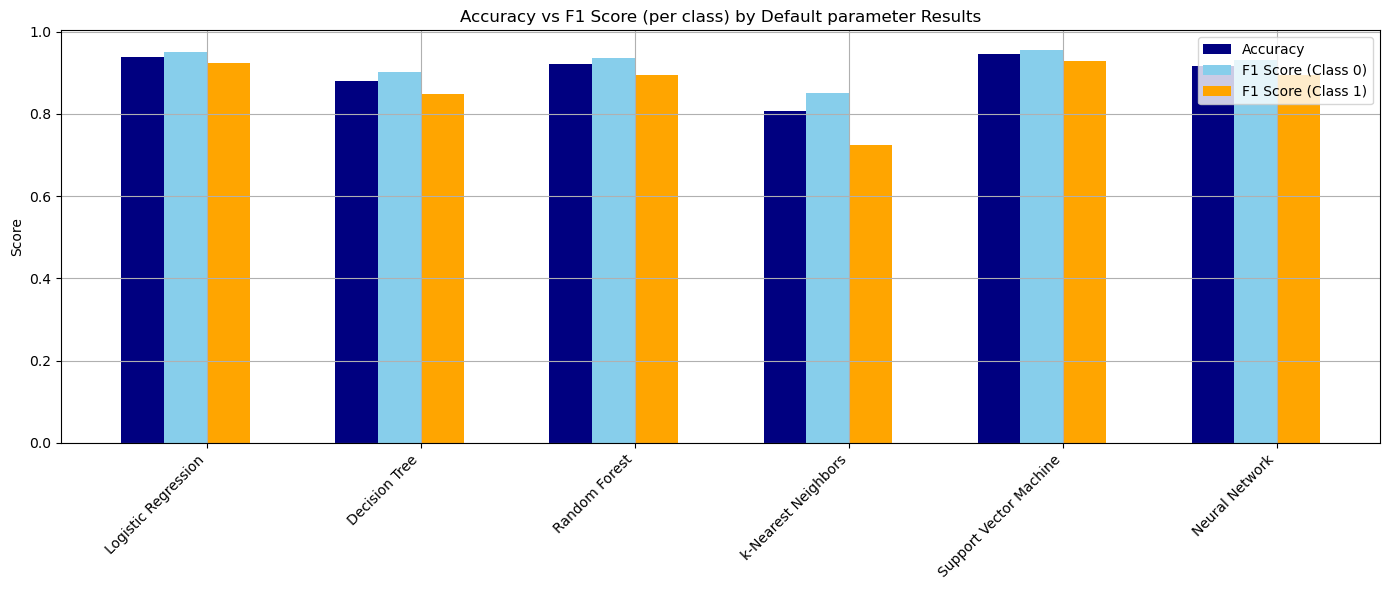

In [84]:
models = results_df["Model"]
accuracy = results_df["Accuracy"]
f1_score_0 = results_df["F1 Score (Class 0)"]
f1_score_1 = results_df["F1 Score (Class 1)"]

x = np.arange(len(models))  # the label locations
width = 0.2  # narrower width for 4 bars

plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='navy')
plt.bar(x - 0.5*width, f1_score_0, width, label='F1 Score (Class 0)', color='skyblue')
plt.bar(x + 0.5*width, f1_score_1, width, label='F1 Score (Class 1)', color='orange')

plt.ylabel('Score')
plt.title('Accuracy vs F1 Score (per class) by Default parameter Results')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
from sklearn.svm import SVC

svm_binary = SVC(C=10, gamma='scale', kernel='linear', probability=True, random_state=42)
svm_binary.fit(X_train, y_train)  # Use your NON-SMOTE X_train/y_train


SVC(C=10, kernel='linear', probability=True, random_state=42)

In [86]:
y_probs = svm_binary.predict_proba(X_test)[:, 1]  # Probability of positive class
y_pred = svm_binary.predict(X_test)


### ROC Curve

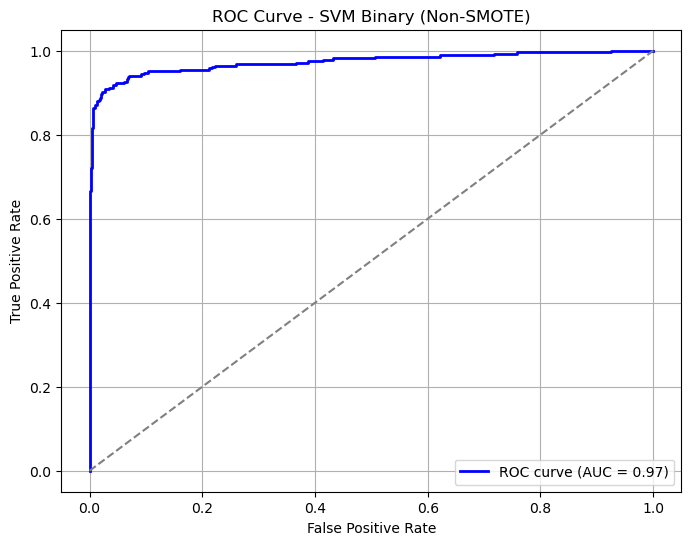

In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Binary (Non-SMOTE)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### ROC AUC = 0.97 → Excellent discriminative power.
The closer to 1.0, the better the classifier is at separating the two classes.

### Precision Recall curve

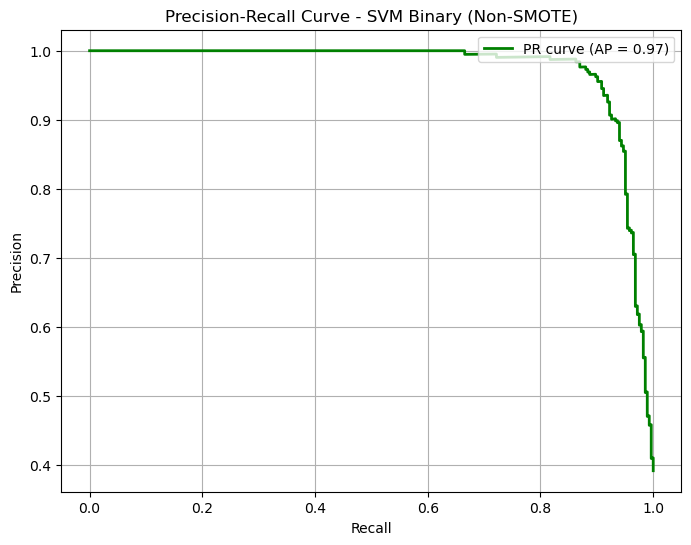

In [91]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM Binary (Non-SMOTE)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### AP (Average Precision) = 0.97 → Also excellent.
This means that across different thresholds, precision and recall remain very high. 

The ROC and Precision-Recall curves for the binary SVM model (Non-SMOTE) show strong separability and precision consistency. The AUC and average precision scores both exceed 0.95, confirming the robustness of the classifier in distinguishing between the two classes without SMOTE augmentation.



### Algorithm performance with Hyperparameter Tuning:
Top three performing models:

1. SVM with an accuracy of 94.49% with consistent Precision, Recall and F1 score of 94.47%. The hyperparameters are: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
   
2. Logistic Regression with an accuracy of 94% with Precision, recall and F1 score of 94%. The best parameters are: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

3. Random Forest and Neural Network with accuracy of 92%.

The best parameters of Neural network is: {'activation': 'relu', 
 'hidden_layer_sizes': (100,) 
 'learning_rate': 'constant ,
 'solver': 'ada

Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

#### Performance Comparison: Before vs After Removing 'Enrolled' Class
The dataset initially contained three classes: Graduate (0), Dropout (1), and Enrolled (2).  The Enrolled class presented significant challenges:

It exhibited ambiguous patterns and overlapped features with both Graduate and Dropout classes.  It showed weak correlations with academic, financial, and demographic factors.  ML models consistently struggled to classify it accurately, with F1 scores ranging around 40% for Enrolled.

Although Graduate and Dropout classes performed reasonably (~80–90% F1 scores), the overall model performance dropped, averaging around 80% accuracy due to the confusion caused by Enrolled.

With the focus shifted to a binary classification task — Graduate vs Dropout, the two remaining classes displayed stronger and more distinct correlations, especially in academic performance metrics.  The removal of the fuzzy Enrolled class eliminated overlap and improved class separability.

ML models achieved a significant performance boost, with Accuracy reaching up to ~94%. F1 scores also as high as ~94%, particularly with SVM after hyperparameter tuning.m'}

# SHAP and LIME Techniques - key Predictors (SVM - Best Model) 

### Training the SVM model

In [95]:
svm_model = SVC(C=10, kernel='linear', gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=10, kernel='linear', probability=True, random_state=42)

In [96]:
y_pred = svm_model.predict(X_test)

Text(0.5, 1.0, 'SVM')

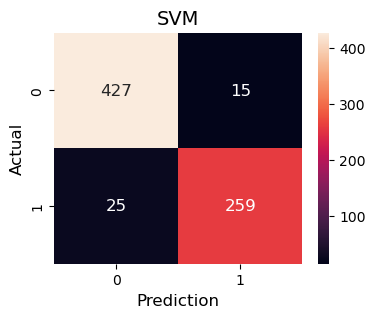

In [97]:
con_mat=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns_plot = sns.heatmap(con_mat, annot=True,fmt='g', annot_kws={"fontsize":12})
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Prediction",fontsize=12)
plt.title("SVM",fontsize=14)

In the Graduate class (442 students), SVM correctly predicted 427 students, misclassifying 15 as dropouts. For the Dropout class (284 students), 259 were correctly identified, with 25 misclassified as graduates. The model shows strong recall for the Graduate class and good performance for the Dropout class, though there are slightly more false negatives in the Dropout class.

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       442
           1       0.95      0.91      0.93       284

    accuracy                           0.94       726
   macro avg       0.94      0.94      0.94       726
weighted avg       0.94      0.94      0.94       726



Class 0: Graduate: The model has a very high recall of 97%, so it effectively identifies most students who are graduates.The overall F1 score of 96% is balanced, with the model achieving the highest accuracy of 94%. 

Class 1: Dropout; The model performs well in classifying dropouts with a precision of 95%. The F1 Score of 93% shows a good balance between precision and recall.

This indicates the model is performing well, with good accuracy, precision, and recall across both classes. The higher recall for the Graduate class suggests that the model is especially good at identifying graduates.

## SHAP (for the best model - SVM)

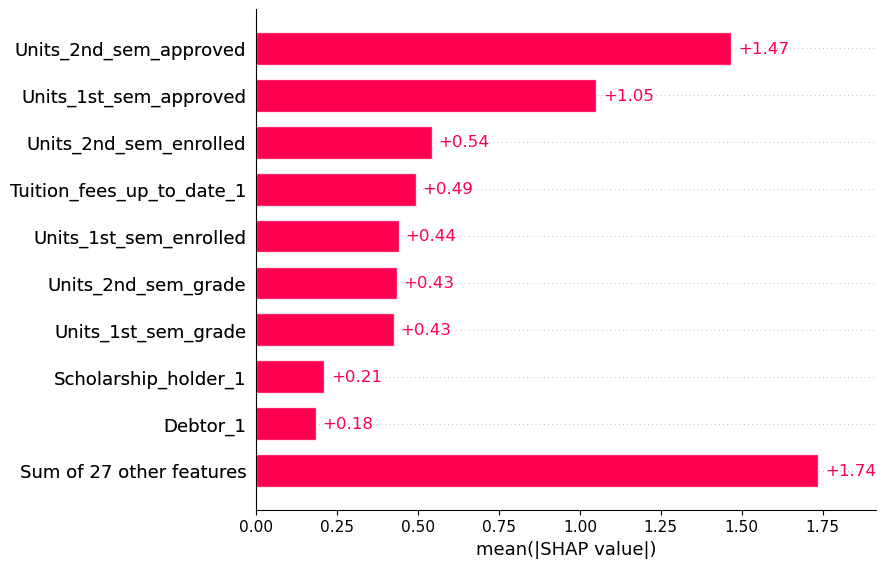

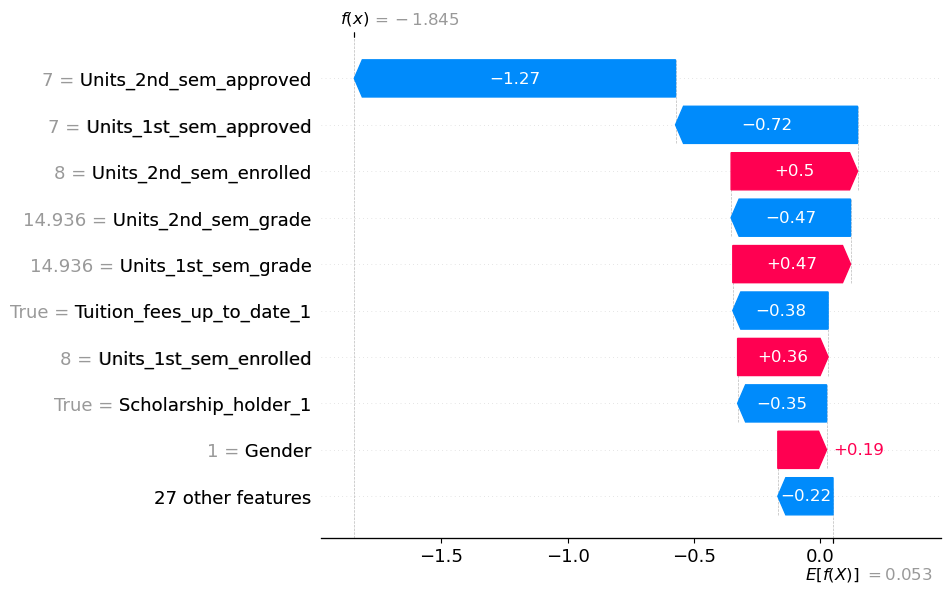

In [102]:
import shap
shap_explainer = shap.Explainer(svm_model, X_train)
shap_values = shap_explainer(X_test)

# Summary bar plot
shap.plots.bar(shap_values)

# Individual prediction explanation (waterfall)
shap.plots.waterfall(shap_values[5])

### Binary Classification Output from SVM for the Individual Student:
Expected Logit (E[f(x)] = 0.053): This represents the baseline logit value used by the model to predict the probability of a student being a dropout (class 1). The value of 0.053 corresponds to a probability of approximately 51% for the student being classified as a dropout, which serves as the reference point.

Individual Logit (f(x) = -1.845): The individual logit for this student is -1.845, which is lower than the baseline expected logit. To interpret this logit, it must be converted into a probability using the sigmoid function.

Probability Conversion: The logit value of -1.845 is passed through the sigmoid function to obtain the probability of the student being a dropout (class 1). A logit of -1.845 results in a probability of 13.6% for the student being classified as a dropout.

Probability of Graduation: Given that the model is a binary classification model, the probability of the student being classified as a graduate (class 0) is the complement of the probability of being a dropout. Therefore, the probability of graduation for this student is 86.4%.

Conclusion:
Since the student has a higher probability of being classified as a graduate (86.4%) compared to being a dropout (13.6%), the model classifies the student as a graduate (class 0).

### Binary Classification Global Output from SHAP:
The global SHAP output provides valuable insights into the overall feature importance for the SVM model in predicting the student classification.

From the initial SHAP plot, it is evident that SVM predominantly relies on academic factors such as units approved, units enrolled, and grades for both Semester 1 and Semester 2. Additionally, financial factors like tuition fees, scholarship status, and debtor status also play a significant role in the model's decision-making process. Other features, including international status and educational special needs, also contribute to the model’s predictions.

Among these, academic and financial factors emerge as the most influential predictors, driving the classification outcome significantly.

### LIME

In [106]:
import lime
from lime import lime_tabular
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Graduate', 'Dropout'],
    mode='classification'
)

# Explain a single instance
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[5],  # or any sample
    predict_fn=svm_model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

### Binary Classification Output for an Individual Student (LIME):

This student has been classified as a Graduate (class 0).

Key Predictors Driving the Classification: The most influential features contributing to the prediction of Graduate are primarily academic factors (such as units approved, enrolled, and credited for both semesters) along with financial factors (such as scholarship holder and debtor status). Additionally, other features like educational special needs and nationality have also contributed to the classification.

Factors Pulling Away from Graduation: On the other hand, certain features are working against the classification of Graduate. These include again some academic factors and other attributes like international status.

SVM Model's Decision Process: The features that SVM has used for prediction largely align with those identified by LIME. The primary contributors to the model's prediction of Graduate are again academic factors, followed by financial factors and, to a lesser extent, other factors like foreign nationality.

In [108]:
new_students_df["Target"].value_counts()

Target
0    2209
1    1421
Name: count, dtype: int64

# Experiment 11: SMOTE and Boosting for Graduate and Dropout classes:

Value_Counts of Target:  0 - 2209 and 1 - 1421

After removing the 'Enrolled' class, models like SVM and Logistic Regression reached up to 94–95% accuracy and F1 scores, while Random Forest and Neural Networks achieved around 92% accuracy and F1 Scores.

To further enhance performance:

SMOTE was applied to address class imbalance between Graduate and Dropout, improving fairness and learning stability.

Boosting algorithms (AdaBoost, Gradient Boosting, XGBoostarere test furthered to improve accuracy by focusing on previous misclassifications
 
### Goal: Use SMOTE + Boosting to boost predictive performance and improve class balance handling.

In [110]:
new_students_df.head()

Marital_status  Application_mode  Application_order  Course  \
0               0                 7                  5       1   
1               0                 5                  1      10   
2               0                 0                  5       4   
3               0                 7                  2      14   
4               1                11                  1       2   

   Day_evening_time  Previous_qualification  Previous_qualifications_grade  \
0                 1                       0                          122.0   
1                 1                       0                          160.0   
2                 1                       0                          122.0   
3                 1                       0                          122.0   
4                 0                       0                          100.0   

   Nationality  Mother_qualification  Father_qualification  Mother_occupation  \
0            0                    12                     9                  5   
1            0                     0                     2                  3   
2            0                    21                    26                  9   
3            0                    22                    26                  5   
4            0                    21                    27                  9   

   Father_occupation  Admission_grade  Educational_special_needs  Gender  \
0                  9            127.3                          0       1   
1                  3            142.5                          0       1   
2                  9            124.8                          0       1   
3                  3            119.6                          0       0   
4                  9            141.5                          0       0   

   Age_at _enrollment  International  Units_1st_sem_credited  \
0                  20              0                       0   
1                  19              0                       0   
2                  19              0                       0   
3                  20              0                       0   
4                  45              0                       0   

   Units_1st_sem_enrolled  Units_1st_sem_evaluations  Units_1st_sem_approved  \
0                       0                          0                       0   
1                       6                          6                       6   
2                       6                          0                       0   
3                       6                          8                       6   
4                       6                          9                       5   

   Units_1st_sem_grade  Units_1st_sem_no_evaluations  Units_2nd_sem_credited  \
0             0.000000                             0                       0   
1            14.000000                             0                       0   
2             0.000000                             0                       0   
3            13.428571                             0                       0   
4            12.333333                             0                       0   

   Units_2nd_sem_enrolled  Units_2nd_sem_evaluations  Units_2nd_sem_approved  \
0                       0                          0                       0   
1                       6                          6                       6   
2                       6                          0                       0   
3                       6                         10                       5   
4                       6                          6                       6   

   Units_2nd_sem_grade  Units_2nd_sem_no_evaluations  Unemployment_rate  \
0             0.000000                             0               10.8   
1            13.666667                             0               13.9   
2             0.000000                             0               10.8   
3            12.400000                             0             

In [111]:
# X = new_students_df.drop(columns=["Target", "Previous_qualifications_grade", "Admission grade"])

X = new_students_df.drop(columns=["Target"])
y = new_students_df["Target"]


#### SMOTE

In [113]:
resample_smote = SMOTE(random_state=42)
X_smote, y_smote = resample_smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({1: 2209, 0: 2209})


In [114]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2, random_state=42)

## ML (Default Parameters) with SMOTE

In [116]:
classifiers = {
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    }

#### Training and testing the ML with default parameters

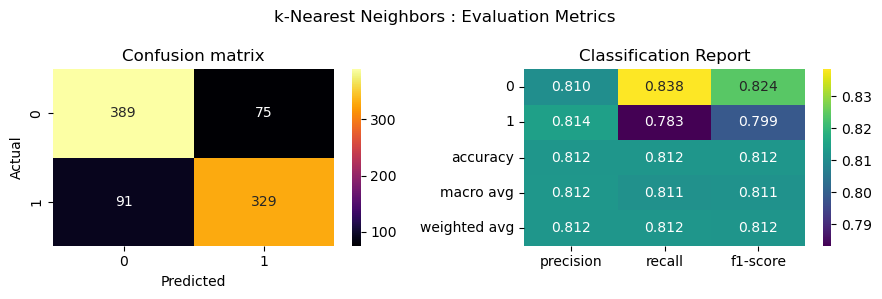

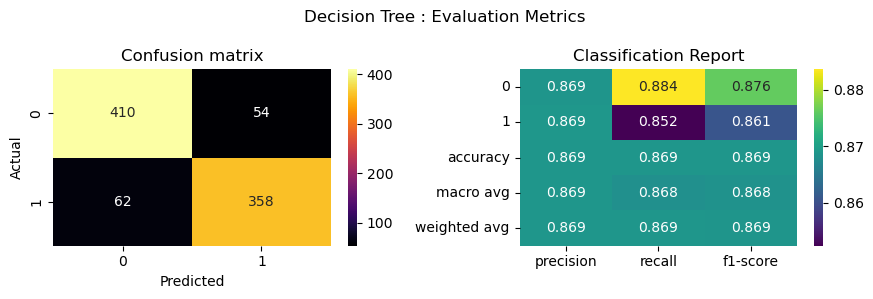

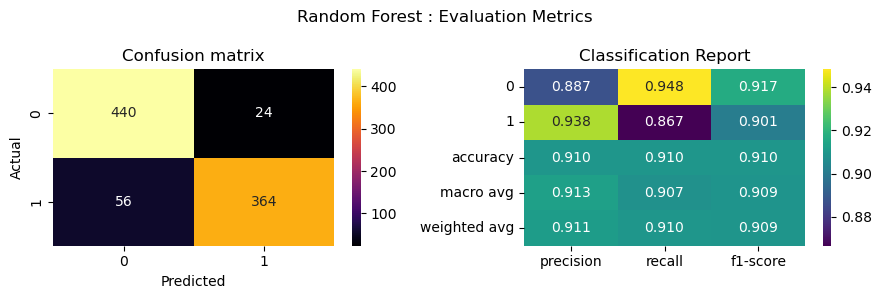

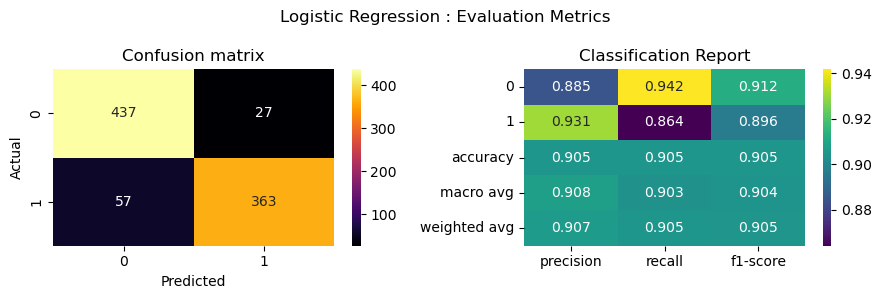

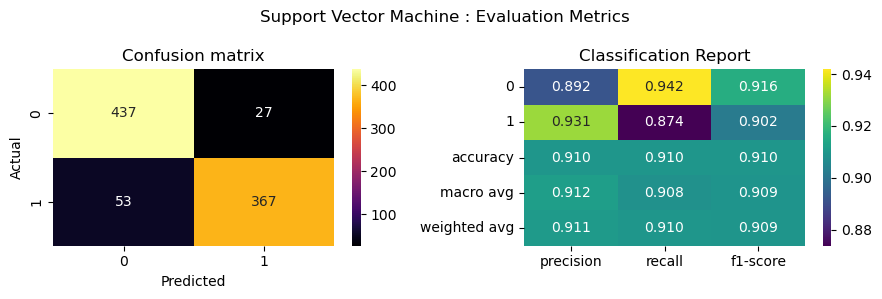

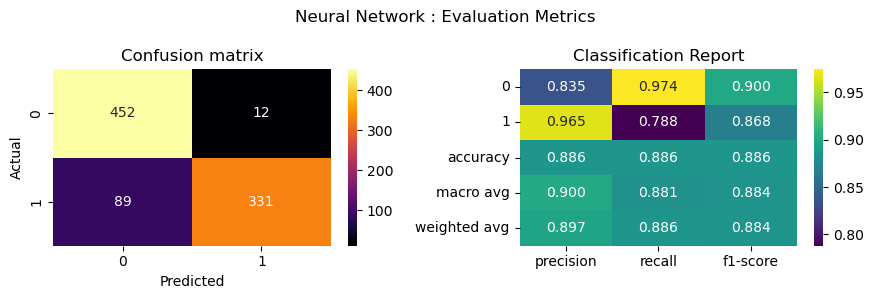

In [118]:
results = []
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_smote, y_train_smote)
    
    # Predict on the test set
    y_pred_smote = classifier.predict(X_test_smote)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test_smote, y_pred_smote)
    report = classification_report(y_test_smote, y_pred_smote, output_dict=True)

    # Individual F1-scores
    f1_class_0 = report['0']['f1-score']
    f1_class_1 = report['1']['f1-score']

    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_weighted = report['weighted avg']['f1-score']
    
    # Append results
    results.append([name, accuracy, precision, recall, f1_weighted, f1_class_0, f1_class_1])

    # visualisations
    plt.figure(figsize=(9,3))
    plt.suptitle(f"{name} : Evaluation Metrics")

    #Confusion matrix heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test_smote, y_pred_smote), annot=True, fmt="g", cmap="inferno")
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    #classification report heatmap
    plt.subplot(1, 2, 2)
    report_df = pd.DataFrame(report).iloc[:-1, :].T
    sns.heatmap(report_df, annot=True, fmt=".3f", cmap="viridis")
    plt.title("Classification Report")
    plt.tight_layout()
    plt.show()

#### ML models results for Default Parameters on test se

In [120]:
default_param_results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Weighted F1 Score", "F1 Score (Class 0)", "F1 Score (Class 1)"])
print("Model Performance Metrics on Test Set after Default parameters:")

pd.set_option("display.max_colwidth", None)  # Show full column width
pd.set_option("display.max_columns", None)   # Show all columns
pd.set_option("display.width", None)         # Prevent line breaks

default_param_results_df

Model Performance Metrics on Test Set after Default parameters:


Model  Accuracy  Precision    Recall  Weighted F1 Score  \
0     k-Nearest Neighbors  0.812217   0.812289  0.812217           0.811985   
1           Decision Tree  0.868778   0.868781  0.868778           0.868708   
2           Random Forest  0.909502   0.911350  0.909502           0.909219   
3     Logistic Regression  0.904977   0.906544  0.904977           0.904706   
4  Support Vector Machine  0.909502   0.910668  0.909502           0.909290   
5          Neural Network  0.885747   0.897029  0.885747           0.884358   

   F1 Score (Class 0)  F1 Score (Class 1)  
0            0.824153            0.798544  
1            0.876068            0.860577  
2            0.916667            0.900990  
3            0.912317            0.896296  
4            0.916143            0.901720  
5            0.899502            0.867628

### Visualisation of the ML (Default parameters) results:

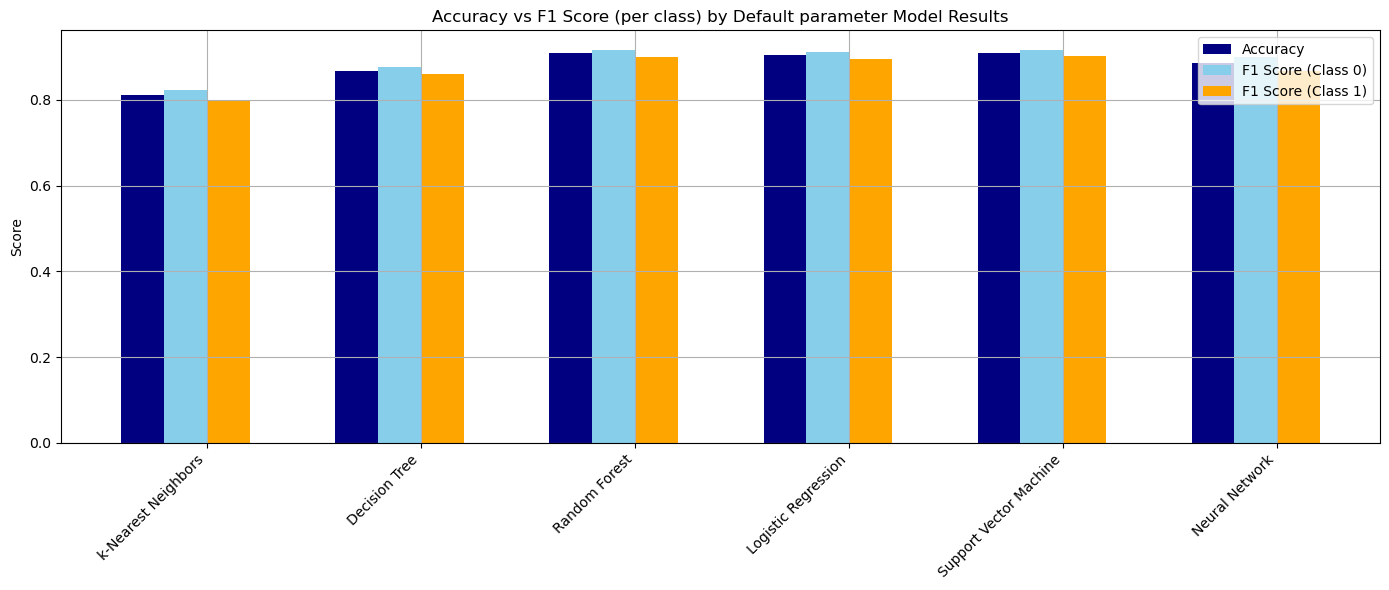

In [122]:
models = default_param_results_df["Model"]
accuracy = default_param_results_df["Accuracy"]
f1_score_0 = default_param_results_df["F1 Score (Class 0)"]
f1_score_1 = default_param_results_df["F1 Score (Class 1)"]

x = np.arange(len(models))  # the label locations
width = 0.2  # narrower width for 4 bars

plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='navy')
plt.bar(x - 0.5*width, f1_score_0, width, label='F1 Score (Class 0)', color='skyblue')
plt.bar(x + 0.5*width, f1_score_1, width, label='F1 Score (Class 1)', color='orange')

plt.ylabel('Score')
plt.title('Accuracy vs F1 Score (per class) by Default parameter Model Results')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

### ML (GridSearchCV Hyperparameters) with SMOTE

In [124]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

#### Parameter Grids

In [126]:
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ['lbfgs', 'liblinear'],
        "penalty": ['l2']
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "k-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']     #The "algorithm" parameter in the KNeighborsClassifier controls how the nearest neighbors search is performed. It determines the method used to compute distances between points in the feature space and find the nearest neighbors. There are four options for the "algorithm"
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf'],
        "gamma": ['scale', 'auto']
    },

    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50)],     # (50,) → A network with 1 hidden layer of 50 neurons. (100,) → A network with 1 hidden layer of 100 neurons. (50,) → A network with 1 hidden layer of 50 neurons (same as the first one).
        "activation": ['sigmoid', 'relu'],
        "solver": ['adam', 'sgd'],
        "learning_rate": ['constant', 'adaptive']       # 'constant': The learning rate remains fixed throughout training. It doesn’t change., 'adaptive': The learning rate starts at a given value and decreases over time if the model's performance plateaus (i.e., when the model is no longer improving after a set number of iterations).
    }
}

#### Training and testing the SMOTE data:

Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


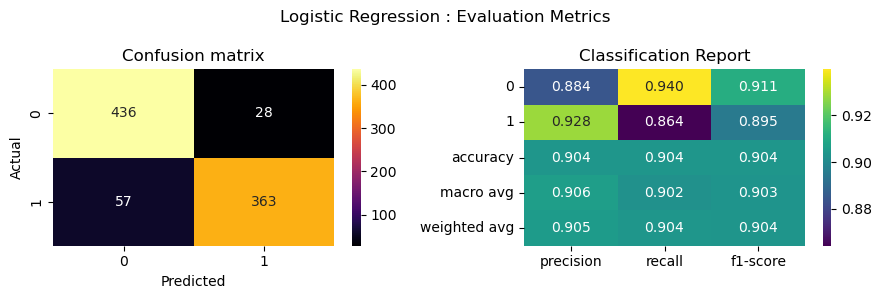

Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


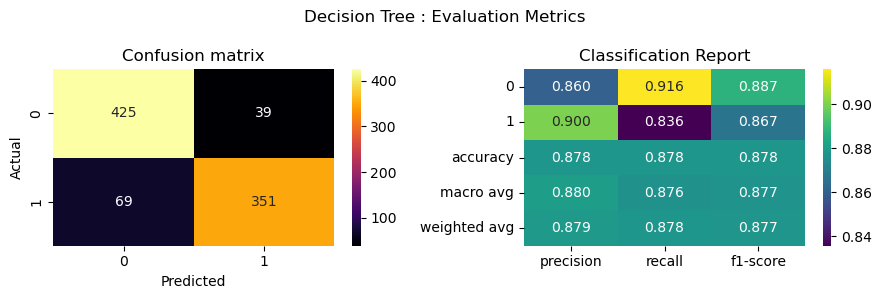

Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


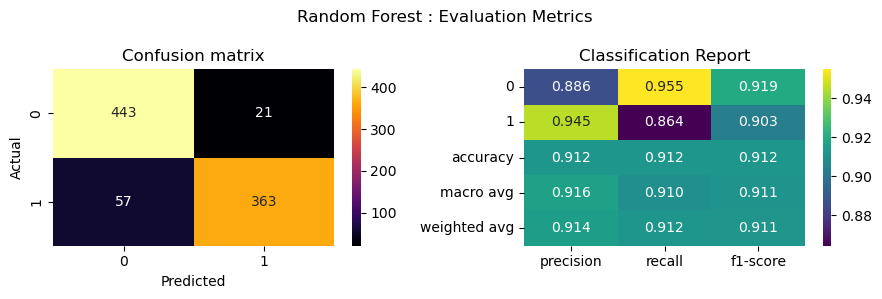

Running GridSearchCV for k-Nearest Neighbors...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


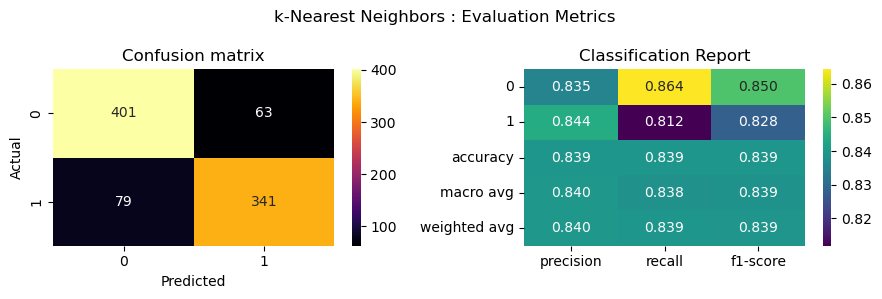

Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


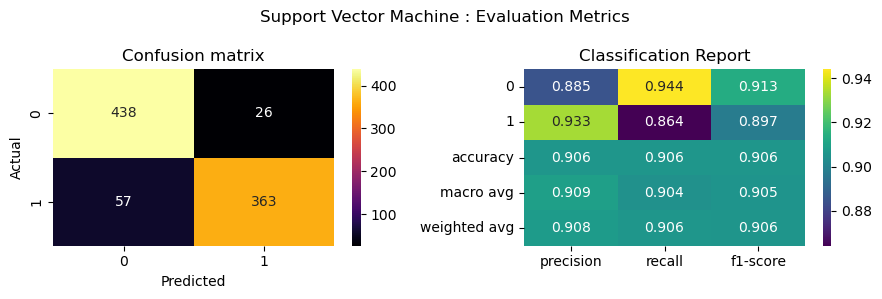

Running GridSearchCV for Neural Network...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


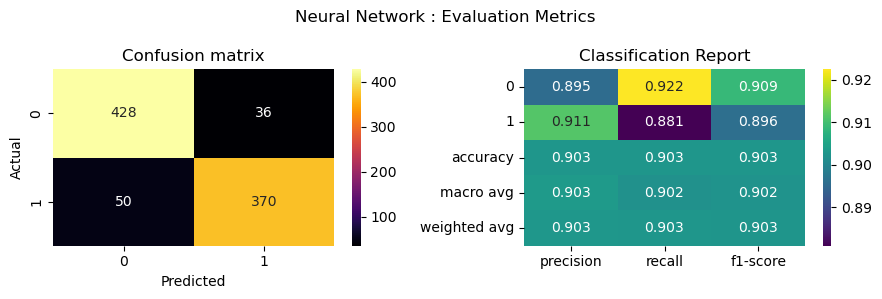

In [128]:
results = []
for name, classifier in classifiers.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], cv = 5, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train_smote, y_train_smote)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predict on the test set with the best model
    y_pred_smote = best_model.predict(X_test_smote)
    
 # Calculate performance metrics
    accuracy = accuracy_score(y_test_smote, y_pred_smote)
    report = classification_report(y_test_smote, y_pred_smote, output_dict=True)

    # Individual F1-scores
    f1_class_0 = report['0']['f1-score']
    f1_class_1 = report['1']['f1-score']

    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_weighted = report['weighted avg']['f1-score']
    
    # Append results
    results.append([name, accuracy, precision, recall, f1_weighted, f1_class_0, f1_class_1, grid_search.best_params_])

    # visualisations
    plt.figure(figsize=(9,3))
    plt.suptitle(f"{name} : Evaluation Metrics")

    #Confusion matrix heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test_smote, y_pred_smote), annot=True, fmt="g", cmap="inferno")
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    #classification report heatmap
    plt.subplot(1, 2, 2)
    report_df = pd.DataFrame(report).iloc[:-1, :].T
    sns.heatmap(report_df, annot=True, fmt=".3f", cmap="viridis")
    plt.title("Classification Report")
    plt.tight_layout()
    plt.show()
    

In [129]:
best_parameters = grid_search.best_params_

#### Convert results to DataFrame:


In [131]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Weighted F1 Score", "F1 Score (Class 0)", "F1 Score (Class 1)", "Best Parameters"])
print("Model Performance Metrics on Test Set after GridSearchCV:")

pd.set_option("display.max_colwidth", None)  # Show full column width
pd.set_option("display.max_columns", None)   # Show all columns
pd.set_option("display.width", None)         # Prevent line breaks

results_df

Model Performance Metrics on Test Set after GridSearchCV:


Model  Accuracy  Precision    Recall  Weighted F1 Score  \
0     Logistic Regression  0.903846   0.905290  0.903846           0.903584   
1           Decision Tree  0.877828   0.879175  0.877828           0.877479   
2           Random Forest  0.911765   0.914180  0.911765           0.911437   
3     k-Nearest Neighbors  0.839367   0.839523  0.839367           0.839168   
4  Support Vector Machine  0.906109   0.907803  0.906109           0.905827   
5          Neural Network  0.902715   0.902967  0.902715           0.902613   

   F1 Score (Class 0)  F1 Score (Class 1)  \
0            0.911181            0.895191   
1            0.887265            0.866667   
2            0.919087            0.902985   
3            0.849576            0.827670   
4            0.913452            0.897404   
5            0.908705            0.895884   

                                                                                      Best Parameters  
0                                                   {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}  
1                                    {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}  
2              {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}  
3                                                             {'algorithm': 'auto', 'n_neighbors': 3}  
4                                                     {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}  
5  {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

#### Visualising of the GridSearchCV results

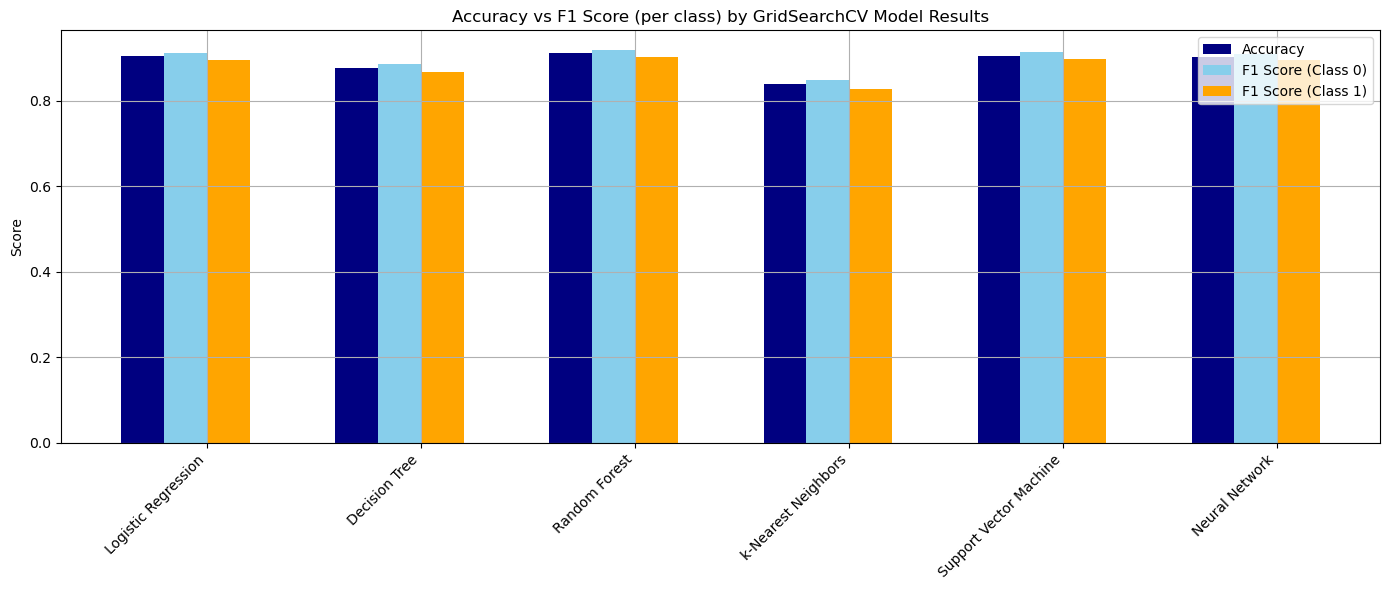

In [133]:
models = results_df["Model"]
accuracy = results_df["Accuracy"]
f1_score_0 = results_df["F1 Score (Class 0)"]
f1_score_1 = results_df["F1 Score (Class 1)"]

x = np.arange(len(models))  # the label locations
width = 0.2  # narrower width for 4 bars

plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='navy')
plt.bar(x - 0.5*width, f1_score_0, width, label='F1 Score (Class 0)', color='skyblue')
plt.bar(x + 0.5*width, f1_score_1, width, label='F1 Score (Class 1)', color='orange')

plt.ylabel('Score')
plt.title('Accuracy vs F1 Score (per class) by GridSearchCV Model Results')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
#pip install optuna
import optuna

# Boosting Models with SMOTE for Target classes - Graduate & Dropout

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from optuna.integration import XGBoostPruningCallback
import xgboost as xgb


In [138]:
# 1. Separate categorical and numeric columns
cat_cols = new_students_df.select_dtypes("category").columns
num_cols = new_students_df.select_dtypes(include=["int64", "float64"]).columns

# 2. Label encode only categorical features
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    new_students_df[col] = LabelEncoder().fit_transform(new_students_df[col])

# 3. Now you can safely select all features
X = new_students_df.drop("Target", axis=1)

y = new_students_df["Target"]

In [139]:
resample_smote = SMOTE(random_state=42)
X_smote_xgb, y_smote_xgb = resample_smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({1: 2209, 0: 2209})


In [140]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote_xgb, y_smote_xgb,test_size=0.2, random_state=42)

### 1. Gradient Boosting - Default

In [142]:
gd = GradientBoostingClassifier(random_state=42)
gd = gd.fit(X_train_smote, y_train_smote)
gd_pred = gd.predict(X_test_smote)

In [143]:
print(classification_report(y_test_smote, gd_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       464
           1       0.93      0.87      0.90       420

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



#### Gradient Boosting with Optuna (Hyperparameters)

In [145]:
def gd_objective(trial):
    param = {
        'verbose': 0,
        "loss": trial.suggest_categorical("loss", ["log_loss", "exponential"]),
        "criterion": trial.suggest_categorical("criterion", ["friedman_mse", "squared_error"]),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "random_state": 42
    }

    clf = GradientBoostingClassifier(**param)
    scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=10, scoring='f1_weighted')
    return scores.mean()

gd_study = optuna.create_study(direction='maximize')
gd_study.optimize(gd_objective, n_trials=20)


[I 2025-05-10 10:38:08,496] A new study created in memory with name: no-name-e92e26d2-6aed-45fe-b54b-76825e83e5de
[I 2025-05-10 10:38:28,707] Trial 0 finished with value: 0.34027438797986354 and parameters: {'loss': 'log_loss', 'criterion': 'friedman_mse', 'learning_rate': 2.274650096968469e-07, 'subsample': 0.7926079729348543}. Best is trial 0 with value: 0.34027438797986354.
[I 2025-05-10 10:38:40,116] Trial 1 finished with value: 0.34027438797986354 and parameters: {'loss': 'exponential', 'criterion': 'friedman_mse', 'learning_rate': 2.517141283755953e-07, 'subsample': 0.30199173577750066}. Best is trial 0 with value: 0.34027438797986354.
[I 2025-05-10 10:38:57,376] Trial 2 finished with value: 0.34027438797986354 and parameters: {'loss': 'exponential', 'criterion': 'squared_error', 'learning_rate': 2.0241480887905555e-06, 'subsample': 0.6508935405575462}. Best is trial 0 with value: 0.34027438797986354.
[I 2025-05-10 10:39:13,095] Trial 3 finished with value: 0.34027438797986354 an

In [146]:
print(gd_study.best_value)
print(gd_study.best_params)

0.9093955965892013
{'loss': 'log_loss', 'criterion': 'squared_error', 'learning_rate': 0.09949943675396496, 'subsample': 0.5591133571568992}


In [147]:
#rodando o SVM com os parametros que ele encontrou = RandomForestClassifier(max_depth = 27, min_samples_leaf = 1, criterion='log_loss', random_state=42)
gd_opt = GradientBoostingClassifier(**gd_study.best_params)
gd_opt = gd_opt.fit(X_train_smote,y_train_smote)
gd_pred_opt = gd.predict(X_test_smote)

In [148]:
print(classification_report(y_test_smote, gd_pred_opt))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       464
           1       0.93      0.87      0.90       420

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



#### 2. Extreme Gradient Boosting (XGBoost) with SMOTE

In [150]:
from xgboost import XGBClassifier

model = XGBClassifier(enable_categorical=True, random_state=42) 
xgd = model.fit(X_train_smote, y_train_smote)
xgd_pred = xgd.predict(X_test_smote)

Text(0.5, 1.0, 'XGB Classifier')

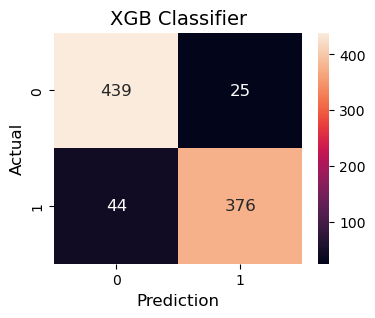

In [151]:
xgd_cm = confusion_matrix(y_test_smote, xgd_pred)
plt.figure(figsize=(4,3))
sns_plot = sns.heatmap(xgd_cm, annot=True,fmt='g', annot_kws={"fontsize":12})
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Prediction",fontsize=12)
plt.title("XGB Classifier",fontsize=14)

In [152]:
print(classification_report(y_test_smote, xgd_pred)) # real / predito

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       464
           1       0.94      0.90      0.92       420

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



##### Class 0 (Graduate):
The model correctly predicted 439 out of 464 actual instances (True Positives), resulting in an F1 Score of 93%, marking a notable improvement compared to the Random Forest Classifier (RFC).

##### Class 1 (Dropout):
The model correctly predicted 376 out of 420 actual instances, yielding an F1 Score of 92%, which is approximately a 1% improvement over the RFC performance.

##### Overall Accuracy:
The overall accuracy remains at 92%, which is comparable to the RFC. While the accuracy is unchanged, the improved F1 scores indicate better class-wise balance and prediction quality.

### Extreme Gradient Booster (Hyperparameters - Optuna)

In [155]:
from sklearn.metrics import f1_score as sk_f1_score

def xgb_objective(trial):
    dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)
    dvalid = xgb.DMatrix(X_test_smote,  label=y_test_smote)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",  # 
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "scale_pos_weight": trial.suggest_float('scale_pos_weight',1,10),  # Keep it moderate
        'eval_metric': 'logloss'
    }

    if param["booster"] in ["gbtree", "dart"]:
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-3, 0.3, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 0.5, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 0.5, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-logloss")
    bst = xgb.train(param, dtrain, evals=[(dvalid, "validation")], callbacks=[pruning_callback])
    
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)  # Because output is probability
    
    f1_score_xgb = sk_f1_score(y_test_smote, pred_labels, average='weighted')
    return f1_score_xgb

In [156]:
xgb_study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5),
    direction="maximize"
)
xgb_study.optimize(xgb_objective, n_trials=20)

[I 2025-05-10 10:43:19,195] A new study created in memory with name: no-name-d9d9bd2a-620f-4a37-9103-dfe46846624c


[0]	validation-logloss:0.97785
[1]	validation-logloss:0.93868
[2]	validation-logloss:0.90289
[3]	validation-logloss:0.86781
[4]	validation-logloss:0.84350
[5]	validation-logloss:0.81516
[6]	validation-logloss:0.79008
[7]	validation-logloss:0.76605
[8]	validation-logloss:0.74554
[9]	validation-logloss:0.72743


[I 2025-05-10 10:43:19,803] Trial 0 finished with value: 0.30605446520278706 and parameters: {'booster': 'gbtree', 'lambda': 0.05154163810559435, 'alpha': 2.7891792387232325e-06, 'subsample': 0.8130660185328342, 'colsample_bytree': 0.8096581780058254, 'scale_pos_weight': 8.62905250625708, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.030016580022991277, 'gamma': 0.03273503166941835, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.30605446520278706.


[0]	validation-logloss:0.70961
[1]	validation-logloss:0.58336
[2]	validation-logloss:0.50559
[3]	validation-logloss:0.44847
[4]	validation-logloss:0.42282
[5]	validation-logloss:0.38869
[6]	validation-logloss:0.36233
[7]	validation-logloss:0.33540
[8]	validation-logloss:0.31769
[9]	validation-logloss:0.30511


[I 2025-05-10 10:43:20,001] Trial 1 finished with value: 0.8754585858690689 and parameters: {'booster': 'dart', 'lambda': 1.596899590739302e-07, 'alpha': 5.467074983886859e-05, 'subsample': 0.7769229781074385, 'colsample_bytree': 0.5826698638080711, 'scale_pos_weight': 5.6919700698723386, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.21015370161765096, 'gamma': 0.10437787266415481, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.70278273336784e-05, 'skip_drop': 2.518558496043248e-07}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.85412
[1]	validation-logloss:0.73724
[2]	validation-logloss:0.66398
[3]	validation-logloss:0.60673
[4]	validation-logloss:0.58347
[5]	validation-logloss:0.54707
[6]	validation-logloss:0.52461
[7]	validation-logloss:0.49581
[8]	validation-logloss:0.48034
[9]	validation-logloss:0.46634


[I 2025-05-10 10:43:20,186] Trial 2 finished with value: 0.7666877057608595 and parameters: {'booster': 'dart', 'lambda': 0.08274710996173736, 'alpha': 1.3644388183543261e-08, 'subsample': 0.6026354791376686, 'colsample_bytree': 0.5579854108527875, 'scale_pos_weight': 8.530593874796686, 'max_depth': 7, 'min_child_weight': 4, 'eta': 0.13336796240296378, 'gamma': 0.07561754037198296, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.34156118002360053, 'skip_drop': 0.0003088284983751996}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.92446
[1]	validation-logloss:0.90800
[2]	validation-logloss:0.89311
[3]	validation-logloss:0.88272
[4]	validation-logloss:0.87224
[5]	validation-logloss:0.86073
[6]	validation-logloss:0.84738
[7]	validation-logloss:0.83386
[8]	validation-logloss:0.82236
[9]	validation-logloss:0.81532


[I 2025-05-10 10:43:20,331] Trial 3 finished with value: 0.30605446520278706 and parameters: {'booster': 'gbtree', 'lambda': 0.46639961223434645, 'alpha': 2.54234493677046e-08, 'subsample': 0.6806588716725483, 'colsample_bytree': 0.4386479753231717, 'scale_pos_weight': 5.070314956319066, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.015383389594988153, 'gamma': 3.422396165533107e-08, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.98934
[1]	validation-logloss:0.98279
[2]	validation-logloss:0.97709
[3]	validation-logloss:0.97378
[4]	validation-logloss:0.97298
[5]	validation-logloss:0.96847
[6]	validation-logloss:0.96214
[7]	validation-logloss:0.95555
[8]	validation-logloss:0.95088
[9]	validation-logloss:0.95007


[I 2025-05-10 10:43:20,449] Trial 4 finished with value: 0.30605446520278706 and parameters: {'booster': 'gbtree', 'lambda': 0.8261127647235749, 'alpha': 8.342272649666422e-07, 'subsample': 0.3641859396396534, 'colsample_bytree': 0.32613844172373857, 'scale_pos_weight': 7.110226000631973, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.006590739015348627, 'gamma': 0.24292609343976615, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.86903
[1]	validation-logloss:0.84216
[2]	validation-logloss:0.81554
[3]	validation-logloss:0.79174
[4]	validation-logloss:0.77294
[5]	validation-logloss:0.75300
[6]	validation-logloss:0.73409
[7]	validation-logloss:0.71444
[8]	validation-logloss:0.69743
[9]	validation-logloss:0.68118


[I 2025-05-10 10:43:20,587] Trial 5 finished with value: 0.30605446520278706 and parameters: {'booster': 'dart', 'lambda': 3.095943894526951e-05, 'alpha': 0.06726330414462367, 'subsample': 0.4315825825254912, 'colsample_bytree': 0.9184138171350655, 'scale_pos_weight': 4.016475582721535, 'max_depth': 5, 'min_child_weight': 5, 'eta': 0.028841952466332255, 'gamma': 1.657171317401221e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 9.304731464343855e-07, 'skip_drop': 8.450515347431041e-05}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.77473
[1]	validation-logloss:0.67786
[2]	validation-logloss:0.61663
[3]	validation-logloss:0.58000
[4]	validation-logloss:0.55014


[I 2025-05-10 10:43:20,677] Trial 6 pruned. Trial was pruned at iteration 5.


[0]	validation-logloss:1.02445
[1]	validation-logloss:1.02280
[2]	validation-logloss:1.02109
[3]	validation-logloss:1.01923
[4]	validation-logloss:1.01849
[5]	validation-logloss:1.01687
[6]	validation-logloss:1.01514
[7]	validation-logloss:1.01343
[8]	validation-logloss:1.01203
[9]	validation-logloss:1.01079


[I 2025-05-10 10:43:20,841] Trial 7 finished with value: 0.30605446520278706 and parameters: {'booster': 'dart', 'lambda': 0.0005038806000617562, 'alpha': 1.1616731309693912e-05, 'subsample': 0.6915583608082315, 'colsample_bytree': 0.6457852343586767, 'scale_pos_weight': 8.942512353734614, 'max_depth': 3, 'min_child_weight': 10, 'eta': 0.0019496239003798275, 'gamma': 1.876490687751111e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.8559786986463128e-05, 'skip_drop': 3.823023268323742e-05}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.97860
[1]	validation-logloss:0.94903
[2]	validation-logloss:0.92620
[3]	validation-logloss:0.90975
[4]	validation-logloss:0.89487
[5]	validation-logloss:0.87884
[6]	validation-logloss:0.85949
[7]	validation-logloss:0.83976
[8]	validation-logloss:0.82454
[9]	validation-logloss:0.81665


[I 2025-05-10 10:43:20,999] Trial 8 finished with value: 0.30605446520278706 and parameters: {'booster': 'gbtree', 'lambda': 1.0347274236217646e-08, 'alpha': 0.007903555062105331, 'subsample': 0.5233803004026172, 'colsample_bytree': 0.36692188540884213, 'scale_pos_weight': 7.734046187322562, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.024693988906343337, 'gamma': 3.3882201636472817e-07, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.88174
[1]	validation-logloss:0.79648
[2]	validation-logloss:0.73744
[3]	validation-logloss:0.69836
[4]	validation-logloss:0.69187
[5]	validation-logloss:0.65556
[6]	validation-logloss:0.61641
[7]	validation-logloss:0.58327
[8]	validation-logloss:0.56139
[9]	validation-logloss:0.55768


[I 2025-05-10 10:43:21,358] Trial 9 finished with value: 0.616342423376827 and parameters: {'booster': 'dart', 'lambda': 1.0714775378159912e-08, 'alpha': 0.014594907596860633, 'subsample': 0.5695069816683789, 'colsample_bytree': 0.3184908565710456, 'scale_pos_weight': 6.437640281129574, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.09726014339141775, 'gamma': 5.2921625896876533e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 4.5351893493904847e-05, 'skip_drop': 9.263710484297143e-08}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.53504
[1]	validation-logloss:0.43310
[2]	validation-logloss:0.36977
[3]	validation-logloss:0.32593
[4]	validation-logloss:0.30701


[I 2025-05-10 10:43:21,651] Trial 10 pruned. Trial was pruned at iteration 5.


[0]	validation-logloss:0.91351
[1]	validation-logloss:0.82171
[2]	validation-logloss:0.75414
[3]	validation-logloss:0.68775
[4]	validation-logloss:0.66560
[5]	validation-logloss:0.62712
[6]	validation-logloss:0.60384
[7]	validation-logloss:0.58025
[8]	validation-logloss:0.55706
[9]	validation-logloss:0.54292


[I 2025-05-10 10:43:21,914] Trial 11 finished with value: 0.6420353311799657 and parameters: {'booster': 'dart', 'lambda': 1.197663002294947e-06, 'alpha': 0.0002114165325888859, 'subsample': 0.24404381253469049, 'colsample_bytree': 0.5581778596907144, 'scale_pos_weight': 9.624326369486525, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.08334666513293905, 'gamma': 0.9478180716367924, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.11097498603078852, 'skip_drop': 0.009334432918722043}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.57256
[1]	validation-logloss:0.46684
[2]	validation-logloss:0.40769
[3]	validation-logloss:0.37681
[4]	validation-logloss:0.36519
[5]	validation-logloss:0.32697


[I 2025-05-10 10:43:22,123] Trial 12 pruned. Trial was pruned at iteration 5.


[0]	validation-logloss:0.89082
[1]	validation-logloss:0.82415
[2]	validation-logloss:0.77042
[3]	validation-logloss:0.72591
[4]	validation-logloss:0.69690
[5]	validation-logloss:0.66181
[6]	validation-logloss:0.63029
[7]	validation-logloss:0.60188
[8]	validation-logloss:0.58021
[9]	validation-logloss:0.55980


[I 2025-05-10 10:43:22,352] Trial 13 finished with value: 0.5068450402043657 and parameters: {'booster': 'dart', 'lambda': 1.0055057493492117e-05, 'alpha': 0.4914142948901792, 'subsample': 0.8115720359180651, 'colsample_bytree': 0.64383047039259, 'scale_pos_weight': 6.187027244581093, 'max_depth': 7, 'min_child_weight': 2, 'eta': 0.06336846886023981, 'gamma': 0.00012292186660494903, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0025688215386603323, 'skip_drop': 0.016999962973270628}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.77339
[1]	validation-logloss:0.63410
[2]	validation-logloss:0.56200
[3]	validation-logloss:0.49795
[4]	validation-logloss:0.47016
[5]	validation-logloss:0.43001
[6]	validation-logloss:0.40063
[7]	validation-logloss:0.38223
[8]	validation-logloss:0.36657
[9]	validation-logloss:0.35099


[I 2025-05-10 10:43:22,892] Trial 14 finished with value: 0.8498855105033183 and parameters: {'booster': 'dart', 'lambda': 1.6829324987155734e-07, 'alpha': 1.8522036438041476e-07, 'subsample': 0.9631033728753019, 'colsample_bytree': 0.5063070776661722, 'scale_pos_weight': 9.956796005128279, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.1921151940524352, 'gamma': 0.05576615654664812, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0022859130667132904, 'skip_drop': 1.825800871306474e-06}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:1.02903
[1]	validation-logloss:1.01871
[2]	validation-logloss:1.01011
[3]	validation-logloss:1.00800
[4]	validation-logloss:1.00720
[5]	validation-logloss:1.00065
[6]	validation-logloss:0.99127
[7]	validation-logloss:0.98251
[8]	validation-logloss:0.98146
[9]	validation-logloss:0.98009


[I 2025-05-10 10:43:23,558] Trial 15 finished with value: 0.30605446520278706 and parameters: {'booster': 'dart', 'lambda': 1.219839432638809e-07, 'alpha': 4.279057363156649e-07, 'subsample': 0.9987979788693673, 'colsample_bytree': 0.2065213635079618, 'scale_pos_weight': 9.82717373959732, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.008575838078662952, 'gamma': 0.0021657387319066104, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0005702467037877893, 'skip_drop': 8.472534452036952e-07}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.84230
[1]	validation-logloss:0.84123
[2]	validation-logloss:0.84013
[3]	validation-logloss:0.83902
[4]	validation-logloss:0.83837
[5]	validation-logloss:0.83727
[6]	validation-logloss:0.83619
[7]	validation-logloss:0.83512
[8]	validation-logloss:0.83417
[9]	validation-logloss:0.83325


[I 2025-05-10 10:43:23,810] Trial 16 finished with value: 0.30605446520278706 and parameters: {'booster': 'dart', 'lambda': 1.866221878194887e-07, 'alpha': 7.692690451496035e-06, 'subsample': 0.8974721179388762, 'colsample_bytree': 0.7575457958001364, 'scale_pos_weight': 3.0073035290299206, 'max_depth': 3, 'min_child_weight': 3, 'eta': 0.001270040124028295, 'gamma': 0.0001076952599968149, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.009533295606653202, 'skip_drop': 1.4987948310386683e-06}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.86088
[1]	validation-logloss:0.80435
[2]	validation-logloss:0.75828
[3]	validation-logloss:0.71529
[4]	validation-logloss:0.67666
[5]	validation-logloss:0.64258
[6]	validation-logloss:0.61354
[7]	validation-logloss:0.58747
[8]	validation-logloss:0.56436
[9]	validation-logloss:0.54422


[I 2025-05-10 10:43:24,287] Trial 17 finished with value: 0.6076856828900903 and parameters: {'booster': 'dart', 'lambda': 1.4581608116428237e-07, 'alpha': 0.0014148859253827351, 'subsample': 0.7448542335264813, 'colsample_bytree': 0.9986637255820981, 'scale_pos_weight': 4.7230470050798825, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.05335813881018486, 'gamma': 0.016300146298829605, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 6.76969986486381e-06, 'skip_drop': 7.024842570456178e-07}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.78362
[1]	validation-logloss:0.65079
[2]	validation-logloss:0.56308
[3]	validation-logloss:0.50305
[4]	validation-logloss:0.46666
[5]	validation-logloss:0.42747
[6]	validation-logloss:0.40065
[7]	validation-logloss:0.37510
[8]	validation-logloss:0.36023
[9]	validation-logloss:0.34906


[I 2025-05-10 10:43:24,865] Trial 18 finished with value: 0.844172010655582 and parameters: {'booster': 'dart', 'lambda': 3.833733264887794e-06, 'alpha': 1.2065352254416713e-07, 'subsample': 0.9066898539651564, 'colsample_bytree': 0.4609140191402208, 'scale_pos_weight': 7.560243595945751, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.18627376004073348, 'gamma': 0.9004020593183609, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 6.567709130302559e-07, 'skip_drop': 2.4173819417864055e-08}. Best is trial 1 with value: 0.8754585858690689.


[0]	validation-logloss:0.95430
[1]	validation-logloss:0.94881
[2]	validation-logloss:0.94366
[3]	validation-logloss:0.93845
[4]	validation-logloss:0.93511
[5]	validation-logloss:0.93011
[6]	validation-logloss:0.92509
[7]	validation-logloss:0.92037
[8]	validation-logloss:0.91647
[9]	validation-logloss:0.91245


[I 2025-05-10 10:43:25,205] Trial 19 finished with value: 0.30605446520278706 and parameters: {'booster': 'dart', 'lambda': 0.00017696174638011635, 'alpha': 6.823692664331303e-05, 'subsample': 0.7595859849368624, 'colsample_bytree': 0.4933666256477324, 'scale_pos_weight': 5.650866544070495, 'max_depth': 7, 'min_child_weight': 9, 'eta': 0.004436144870911372, 'gamma': 1.0461625404315992e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0004873088137251037, 'skip_drop': 0.43785374255008597}. Best is trial 1 with value: 0.8754585858690689.


In [157]:
print(xgb_study.best_value)
print(xgb_study.best_params)

0.8754585858690689
{'booster': 'dart', 'lambda': 1.596899590739302e-07, 'alpha': 5.467074983886859e-05, 'subsample': 0.7769229781074385, 'colsample_bytree': 0.5826698638080711, 'scale_pos_weight': 5.6919700698723386, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.21015370161765096, 'gamma': 0.10437787266415481, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.70278273336784e-05, 'skip_drop': 2.518558496043248e-07}


In [158]:

xgb_opt = XGBClassifier(
    **xgb_study.best_params,
    enable_categorical=True,
    use_label_encoder=False,  # optional, suppresses warning
    eval_metric="mlogloss",
    random_state=42
    
)

xgb_opt=xgb_opt.fit(X_train_smote, y_train_smote)
xgb_pred_opt = xgb_opt.predict(X_test_smote)

In [159]:
print(classification_report(y_test_smote, xgb_pred_opt))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       464
           1       0.92      0.91      0.91       420

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



Text(0.5, 1.0, 'XGB')

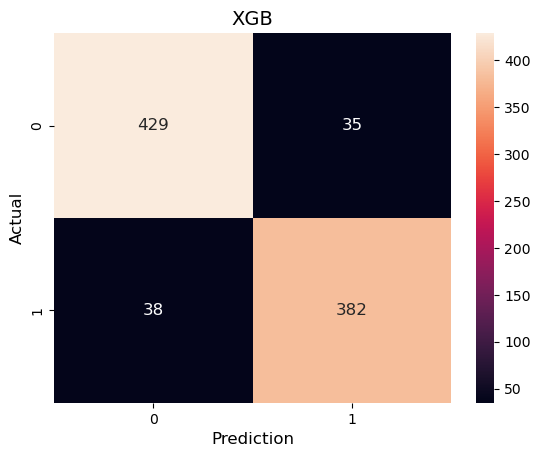

In [160]:
xgb_cm = confusion_matrix(y_test_smote, xgb_pred_opt)
plt.figure()
sns_plot = sns.heatmap(xgb_cm, annot=True,fmt='g', annot_kws={"fontsize":12})
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Prediction",fontsize=12)
plt.title("XGB",fontsize=14)

### 3. CAT Boost with SMOTE (Default Parameters)

In [162]:
X= new_students_df.drop(columns=['Target'])
y = new_students_df['Target']

In [163]:
smote_cat = SMOTE(random_state=42)
X_smote, y_smote = smote_cat.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({1: 2209, 0: 2209})


In [164]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.20, random_state=42)

In [165]:
cat = CatBoostClassifier(random_state = 42, verbose = 0)
cat = cat.fit(X_train_smote, y_train_smote)
cat_pred = cat.predict(X_test_smote)

In [166]:
print(classification_report(y_test_smote, cat_pred)) # real / predito

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       464
           1       0.94      0.88      0.91       420

    accuracy                           0.92       884
   macro avg       0.92      0.91      0.92       884
weighted avg       0.92      0.92      0.92       884



### 4. CATBOOST (Hyperparameter - Optuna) with SMOTE

In [168]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def cat_objective(trial):
    model = CatBoostClassifier(
        loss_function="Logloss",  
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        verbose=False,
        random_seed=42
    )

    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')  # Can also use 'f1' if unweighted
    return scores.mean()

cat_study = optuna.create_study(direction='maximize')
cat_study.optimize(cat_objective, n_trials=20)

[I 2025-05-10 10:43:42,072] A new study created in memory with name: no-name-7f163b23-1e6e-4b00-b2bf-f63dbde9dd1b
[I 2025-05-10 10:44:23,541] Trial 0 finished with value: 0.8895516968948967 and parameters: {'iterations': 771, 'learning_rate': 0.001744678233742745, 'depth': 7}. Best is trial 0 with value: 0.8895516968948967.
[I 2025-05-10 10:49:27,364] Trial 1 finished with value: 0.9181740672948029 and parameters: {'iterations': 870, 'learning_rate': 0.06293383785524573, 'depth': 10}. Best is trial 1 with value: 0.9181740672948029.
[I 2025-05-10 10:49:34,265] Trial 2 finished with value: 0.9127807669967257 and parameters: {'iterations': 210, 'learning_rate': 0.07250902849878449, 'depth': 5}. Best is trial 1 with value: 0.9181740672948029.
[I 2025-05-10 10:50:17,090] Trial 3 finished with value: 0.9190259049532253 and parameters: {'iterations': 935, 'learning_rate': 0.052946554081265015, 'depth': 6}. Best is trial 3 with value: 0.9190259049532253.
[I 2025-05-10 10:50:58,155] Trial 4 fin

In [169]:
print(cat_study.best_value)
print(cat_study.best_params)

0.9190259049532253
{'iterations': 935, 'learning_rate': 0.052946554081265015, 'depth': 6}


In [170]:
cat_opt = CatBoostClassifier(**cat_study.best_params, verbose=0)
cat_opt = cat_opt.fit(X_train_smote, y_train_smote)
cat_pred_opt = cat_opt.predict(X_test_smote)

In [171]:
print(classification_report(y_test_smote, cat_pred_opt)) # real / predito

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       464
           1       0.94      0.89      0.92       420

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



### 5. LightGBM Model (Default Parameter) - with SMOTE

In [173]:
X.columns = X.columns.str.replace(" ", "_")


In [174]:
import lightgbm as lgb 


lgbm = lgb.LGBMClassifier(random_state=42)
lgbm = lgbm.fit(X_train_smote, y_train_smote)
lgbm_pred = lgbm.predict(X_test_smote)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1789, number of negative: 1745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2195
[LightGBM] [Info] Number of data points in the train set: 3534, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506225 -> initscore=0.024902
[LightGBM] [Info] Start training from score 0.024902


In [175]:
print(classification_report(y_test_smote,lgbm_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       464
           1       0.94      0.89      0.92       420

    accuracy                           0.92       884
   macro avg       0.93      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



### 6. LightGBM (Hyperparameter - Optuna) with SMOTE

In [177]:
from sklearn.model_selection import cross_val_score

def objective_lightgbm(trial):
    param = {
        "objective": "binary",                     
        "metric": "binary_logloss",                
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    model = lgb.LGBMClassifier(**param, random_state=42)
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="f1_weighted")

    return scores.mean()

# Start the Optuna study
study_lightgbm = optuna.create_study(direction="maximize")
study_lightgbm.optimize(objective_lightgbm, n_trials=20)

[I 2025-05-10 11:42:28,541] A new study created in memory with name: no-name-dcdbf872-33b5-4c66-baab-fcdd0d063908
[I 2025-05-10 11:42:30,741] Trial 0 finished with value: 0.9102371179620816 and parameters: {'lambda_l1': 0.0017357234401470035, 'lambda_l2': 1.2393975644154805e-06, 'num_leaves': 251, 'feature_fraction': 0.8131476823541472, 'bagging_fraction': 0.48815420671784643, 'bagging_freq': 7, 'min_child_samples': 70}. Best is trial 0 with value: 0.9102371179620816.
[I 2025-05-10 11:42:34,232] Trial 1 finished with value: 0.9147787499406281 and parameters: {'lambda_l1': 0.00015142544164467307, 'lambda_l2': 0.4754460256037102, 'num_leaves': 179, 'feature_fraction': 0.5430465053177197, 'bagging_fraction': 0.9695386784388157, 'bagging_freq': 5, 'min_child_samples': 72}. Best is trial 1 with value: 0.9147787499406281.
[I 2025-05-10 11:42:36,935] Trial 2 finished with value: 0.911945335310198 and parameters: {'lambda_l1': 0.48634677215979893, 'lambda_l2': 0.012721442963998205, 'num_leaves

In [178]:
print(study_lightgbm.best_value)
print(study_lightgbm.best_params)

0.9181700745218837
{'lambda_l1': 0.002170046660385239, 'lambda_l2': 1.3986658402012287e-08, 'num_leaves': 162, 'feature_fraction': 0.6097415776351219, 'bagging_fraction': 0.9911212176102943, 'bagging_freq': 7, 'min_child_samples': 77}


In [179]:
lgbm_opt = lgb.LGBMClassifier(**study_lightgbm.best_params,random_state=42)
lgbm_opt = lgbm_opt.fit(X_train_smote, y_train_smote)
lgbm_pred_opt = lgbm_opt.predict(X_test_smote)

In [180]:
print(classification_report(y_test_smote,lgbm_pred_opt))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       464
           1       0.94      0.88      0.91       420

    accuracy                           0.92       884
   macro avg       0.92      0.91      0.92       884
weighted avg       0.92      0.92      0.92       884



Text(0.5, 1.0, 'LGB')

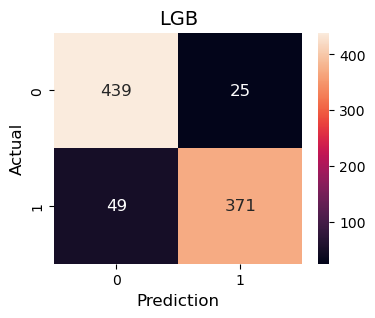

In [181]:
lgbm_cm=confusion_matrix(y_test_smote,lgbm_pred_opt)
plt.figure(figsize=(4,3))
sns_plot = sns.heatmap(lgbm_cm, annot=True,fmt='g', annot_kws={"fontsize":12})
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Prediction",fontsize=12)
plt.title("LGB",fontsize=14)

Out of the 464 students in the Graduate class, the model correctly predicted 447 students as graduates (True Positives) and misclassified 17 students as dropouts. The model achieved a high recall rate of 0.96 for this class.

Out of the 420 students in the Dropout class, the model correctly predicted 372 students as dropouts and misclassified 48 students as graduates. As a result, the recall rate for the Dropout class (0.89) is slightly lower than the recall rate for the Graduate class.

The precision for the Graduate class is 0.90, which is slightly lower due to the misclassification of 48 students as Dropouts. However, the precision for the Dropout class is relatively high since only 17 Graduate students were misclassified.

Overall, the F1 Score is high and well-balanced, indicating that the model performs well for both classes. The model’s accuracy of 93% is the highest among all models when using SMOTE for binary classification (Graduates and Dropouts).

In [183]:
import lime
from lime import lime_tabular
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_smote),
    feature_names=X_train_smote.columns,
    class_names=['Graduate', 'Dropout'],
    mode='classification'
)

# Explain a single instance
lime_exp = lime_explainer.explain_instance(
    data_row=X_test_smote.iloc[5],  # or any sample
    predict_fn=lgbm_opt.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

# Experiment 12: Visualisations of the Test Results of the top models

In [185]:
class_wise_results = pd.read_csv("Top_Results_Class_wise.csv")
class_wise_results

Category                                               Name  \
0   Multiclass (Non-SMOTE)  Exp3_NeuralNetwork_Default_LDA                      
1   Multiclass (Non-SMOTE)                                 Exp3_SVM_Tuned_LDA   
2   Multiclass (Non-SMOTE)                       Exp3_NeuralNetwork_Tuned_LDA   
3       Multiclass (SMOTE)                                     Exp4_SVM_Tuned   
4       Multiclass (SMOTE)                                Exp6_CatBoost_Tuned   
5       Multiclass (SMOTE)                      Exp6_LightGradientBoost_Tuned   
6       Binary (Non-SMOTE)                      Exp8_LogisticRegression_Tuned   
7       Binary (Non-SMOTE)                                     Exp8_SVM_Tuned   
8       Binary (Non-SMOTE)                    Exp8_LogisticRegression_Default   
9           Binary (SMOTE)                                Exp9_CatBoost_Tuned   
10          Binary (SMOTE)                    Exp9_LightGradientBoost_Default   
11          Binary (SMOTE)                            Exp9_RandomForest_Tuned   
12          Binary (SMOTE)                                     Exp9_SVM_Tuned   

    Accuracy  Precision  Recall  F1 Wtd  F1(C0)  F1 (C1)  F1 (C2)  \
0      0.797      0.782   0.797   0.786   0.871    0.838    0.457   
1      0.802      0.786   0.802   0.786   0.875    0.838    0.448   
2      0.792      0.777   0.792   0.781   0.866    0.831    0.455   
3      0.842      0.847   0.842   0.841   0.794    0.836    0.892   
4      0.840      0.850   0.840   0.840   0.840    0.860    0.830   
5      0.860      0.870   0.860   0.860   0.860    0.870    0.850   
6      0.939      0.939   0.939   0.939   0.950    0.923      NaN   
7      0.945      0.945   0.945   0.945   0.955    0.928      NaN   
8      0.917      0.918   0.917   0.917   0.935    0.887      NaN   
9      0.930      0.930   0.930   0.930   0.930    0.920      NaN   
10     0.920      0.920   0.920   0.920   0.930    0.920      NaN   
11     0.912      0.914   0.912   0.911   0.919    0.903      NaN   
12     0.906      0.908   0.906   0.906   0.913    0.897      NaN   

                                                                                                                   Notes  
0     LDA transformed data - Default Parameters. Best F1 for all classes especially Class 2, high performance across all  
1                                  LDA GridSearchCV Hyperparameters. Highest overall accuracy, well-balanced all classes  
2              LDA GridSearchCV Hyperparameters. Tuned version still strong on Class 2 and well balanced, solid overall.  
3                                             SMOTE Hyperparamters. Highest Class 2 F1, strong overall the other models.  
4                                                                     SMOTE + Boosting. Balanced, robust boosting model.  
5                                                                    SMOTE + Boosting. Top overall performance, balanced  
6                    Binary Classification -NON SMOTE Hyperparameters. High accuracy and balanced F1score of all classes  
7   Binary Classification - NON SMOTE Hyperparameters. Highest accuracy and well balanced across all metrics of classes.  
8                  Binary Classification - Non SMOTE Default parameters. Strong accuracy for a default non SMOTE model.   
9                                                                     Binary - SMOTE - Boosting Models - Hyperparameters  
10                                                                    Binary - SMOTE - Boosting Models - Hyperparameters  
11                      Binary - SMOTE - Hyperparameters. For a traditional model, it performed better in this category.  
12                      Binary - SMOTE - Hyperparameters. For a traditional model, it performed better in this category.

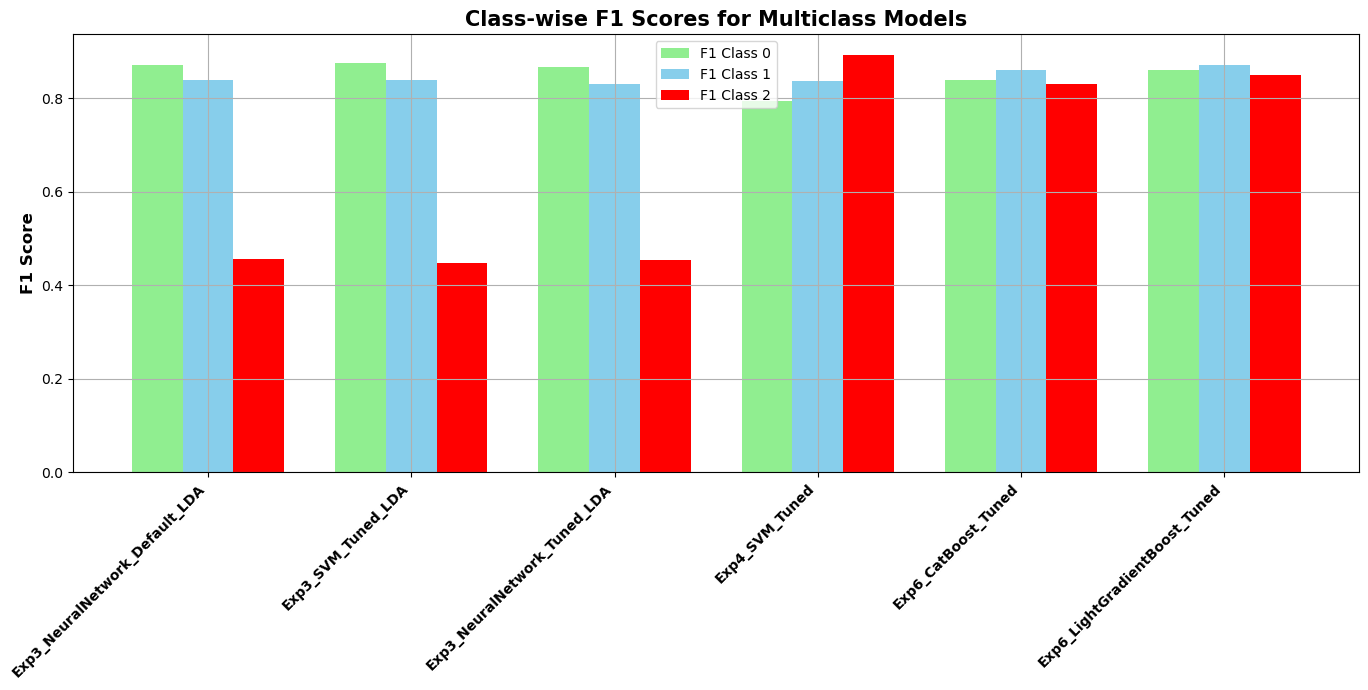

In [186]:
# Only for models with class-wise F1 scores (Multiclass)
multiclass_df = class_wise_results[class_wise_results['Category'].str.contains('Multiclass')].copy()

# Plotting grouped F1 scores per class
labels = multiclass_df['Name'].str.strip()


x = range(len(labels))
width = 0.25

plt.figure(figsize=(14, 7))
plt.bar([p - width for p in x], multiclass_df['F1(C0)'], width, label='F1 Class 0', color='lightgreen')
plt.bar(x, multiclass_df['F1 (C1)'], width, label='F1 Class 1', color='skyblue')
plt.bar([p + width for p in x], multiclass_df['F1 (C2)'], width, label='F1 Class 2', color='red')

plt.xticks(x, labels, rotation=45, ha='right', fontsize=10, weight='bold')
plt.ylabel('F1 Score', fontsize=12, weight='bold')
plt.title('Class-wise F1 Scores for Multiclass Models', fontsize=15, weight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualisation of the top models for Binary classification

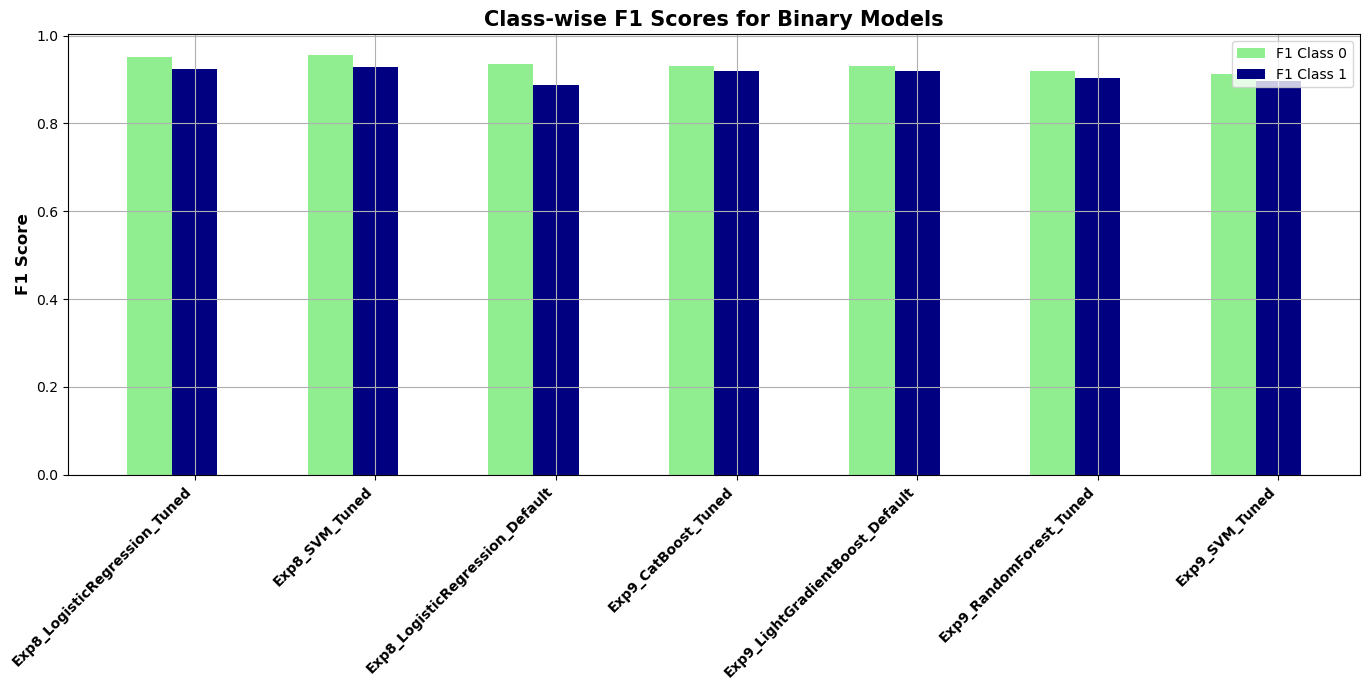

In [188]:
# Only for models with class-wise F1 scores (Binary)
multiclass_df = class_wise_results[class_wise_results['Category'].str.contains('Binary')].copy()

# Plotting grouped F1 scores per class
labels = multiclass_df['Name'].str.strip()


x = range(len(labels))
width = 0.25

plt.figure(figsize=(14, 7))
plt.bar([p - width for p in x], multiclass_df['F1(C0)'], width, label='F1 Class 0', color='lightgreen')
plt.bar(x, multiclass_df['F1 (C1)'], width, label='F1 Class 1', color='navy')

plt.xticks(x, labels, rotation=45, ha='right', fontsize=10, weight='bold')
plt.ylabel('F1 Score', fontsize=12, weight='bold')
plt.title('Class-wise F1 Scores for Binary Models', fontsize=15, weight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualisations for SMOTE and Non-SMOTE for all models (Multiclass and Binary)

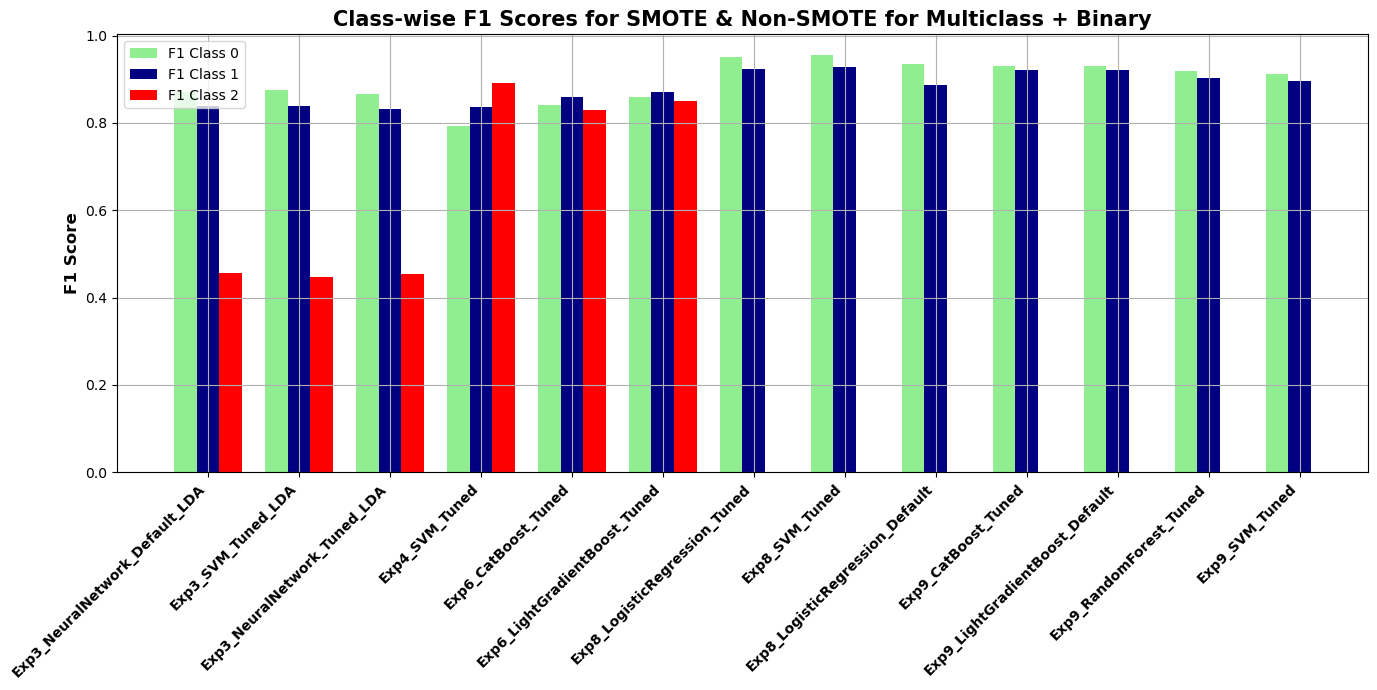

In [190]:
# Only for models with class-wise F1 scores (Binary)
multiclass_df = class_wise_results[class_wise_results['Category'].str.contains('SMOTE')].copy()

# Plotting grouped F1 scores per class
labels = multiclass_df['Name'].str.strip()


x = range(len(labels))
width = 0.25

plt.figure(figsize=(14, 7))
plt.bar([p - width for p in x], multiclass_df['F1(C0)'], width, label='F1 Class 0', color='lightgreen')
plt.bar(x, multiclass_df['F1 (C1)'], width, label='F1 Class 1', color='navy')
plt.bar([p + width for p in x], multiclass_df['F1 (C2)'], width, label='F1 Class 2', color='red')

plt.xticks(x, labels, rotation=45, ha='right', fontsize=10, weight='bold')
plt.ylabel('F1 Score', fontsize=12, weight='bold')
plt.title('Class-wise F1 Scores for SMOTE & Non-SMOTE for Multiclass + Binary', fontsize=15, weight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Evaluation:
The following are the top 12 results across Multiclass and Binary classification, using both SMOTE and Non-SMOTE methods.

#### Multiclass Classification:
The first three models indicate the use of Non-SMOTE, as evidenced by Class 2 performance in the 0.40s, while Classes 0 and 1 show scores in the 0.80s. After introducing SMOTE, the subsequent three models demonstrate a significant improvement in Class 2's performance (highlighted by the red bars). Class 2 performance dramatically jumped to 0.85 – 0.89, almost matching the scores of Class 0 and Class 1.
This clear improvement demonstrates the positive impact of SMOTE in balancing the data and giving minority class examples a fairer representation during training.

In the Multiclass comparison between SMOTE vs Non-SMOTE, the SVM Tuned model performed the highest, though it was closely followed by CatBoost and LightGradientBoost, which demonstrated consistent and stable scores across the different classes.


#### Binary Classification:
For Binary Classification, Non-SMOTE models achieved slightly higher scores, with SVM Tuned leading with an accuracy of 95%. When SMOTE was applied, Boosting models like LightGradientBoost and CatBoost (with accuracies of 93%) showed significant improvement, along with stability in the class-wise F1 scores. While CatBoost performed excellently with high accuracy and balanced class-wise F1 scores, SVM was very close to matching its performance.  This suggests that class imbalance was less severe in the binary setting, making SMOTE less critical for improvement.

## Conclusion:
#### 1. SVM Tuned:
SVM consistently achieved the highest scores across all strategies—both in Multiclass SMOTE and Non-SMOTE, as well as Binary Non-SMOTE. With SMOTE, SVM's performance was closely matched by CatBoost, though SVM remained a reliable top performer.

#### 2. Boosting Models:
Boosting models were employed using the SMOTE strategy and consistently yielded higher scores and improved consistency in class-wise F1 scores. Among the Boosting models, CatBoost and LightGradientBoost performed exceptionally well, with stable and balanced results across all classes.

#### 3. Traditional Models:
While SVM Tuned was the top performer across the board, other traditional models such as Neural Network (Default and Tuned) and Logistic Regression (Default and Tuned) also showed solid results. These models performed well under both SMOTE and Non-SMOTE strategies, with the Neural Network models and Logistic Regression models demonstrating a relatively consistent performance.

# Recommendation:
Based on overall performance, especially class-wise balance and stability, the final recommendation for multiclass classification is the SVM Tuned (with SMOTE), followed closely by CatBoost and LightGBM. For binary classification, SVM Tuned without SMOTE is the top performer, while CatBoost and LightGBM (with SMOTE) offer strong alternatives.